In [1]:
print("CZ12fas312ewd!")

[1] "CZ12fas312ewd!"


In [2]:
.libPaths()

[1] "/home/vmottaqi/R/x86_64-pc-linux-gnu-library"   
[2] "/home/vmottaqi/.conda/envs/renv_1/lib/R/library"

In [3]:
# Set default library paths
.libPaths(c("/home/vmottaqi/.conda/envs/renv_1/lib/R/library"))


In [4]:
installed.packages()

Package       LibPath                                      
abind         abind         /home/vmottaqi/.conda/envs/renv/lib/R/library
AnnotationDbi AnnotationDbi /home/vmottaqi/.conda/envs/renv/lib/R/library
ape           ape           /home/vmottaqi/.conda/envs/renv/lib/R/library
aplot         aplot         /home/vmottaqi/.conda/envs/renv/lib/R/library
askpass       askpass       /home/vmottaqi/.conda/envs/renv/lib/R/library
backports     backports     /home/vmottaqi/.conda/envs/renv/lib/R/library
base          base          /home/vmottaqi/.conda/envs/renv/lib/R/library
base64enc     base64enc     /home/vmottaqi/.conda/envs/renv/lib/R/library
BH            BH            /home/vmottaqi/.conda/envs/renv/lib/R/library
Biobase       Biobase       /home/vmottaqi/.conda/envs/renv/lib/R/library
BiocBaseUtils BiocBaseUtils /home/vmottaqi/.conda/envs/renv/lib/R/library
BiocGenerics  BiocGenerics  /home/vmottaqi/.conda/envs/renv/lib/R/library
BiocManager   BiocManager   /home/vmottaqi/.conda/envs/renv/lib/R/library
BiocParallel  BiocParallel  /home/vmottaqi/.conda/envs/renv/lib/R/library
BiocVersion   BiocVersion   /home/vmottaqi/.conda/envs/renv/lib/R/library
Biostrings    Biostrings    /home/vmottaqi/.conda/envs/renv/lib/R/library
bit           bit           /home/vmottaqi/.conda/envs/renv/lib/R/library
bit64         bit64         /home/vmottaqi/.conda/envs/renv/lib/R/library
bitops        bitops        /home/vmottaqi/.conda/envs/renv/lib/R/library
blob          blob          /home/vmottaqi/.conda/envs/renv/lib/R/library
boot          boot          /home/vmottaqi/.conda/envs/renv/lib/R/library
broom         broom         /home/vmottaqi/.conda/envs/renv/lib/R/library
bslib         bslib         /home/vmottaqi/.conda/envs/renv/lib/R/library
BumpyMatrix   BumpyMatrix   /home/vmottaqi/.conda/envs/renv/lib/R/library
cachem        cachem        /home/vmottaqi/.conda/envs/renv/lib/R/library
callr         callr         /home/vmottaqi/.conda/envs/renv/lib/R/library
caret         caret         /home/vmottaqi/.conda/envs/renv/lib/R/library
cellranger    cellranger    /home/vmottaqi/.conda/envs/renv/lib/R/library
class         class         /home/vmottaqi/.conda/envs/renv/lib/R/library
cli           cli           /home/vmottaqi/.conda/envs/renv/lib/R/library
⋮             ⋮             ⋮                                            
tidygraph     tidygraph     /home/vmottaqi/.conda/envs/renv/lib/R/library
tidyr         tidyr         /home/vmottaqi/.conda/envs/renv/lib/R/library
tidyselect    tidyselect    /home/vmottaqi/.conda/envs/renv/lib/R/library
tidytree      tidytree      /home/vmottaqi/.conda/envs/renv/lib/R/library
tidyverse     tidyverse     /home/vmottaqi/.conda/envs/renv/lib/R/library
timechange    timechange    /home/vmottaqi/.conda/envs/renv/lib/R/library
timeDate      timeDate      /home/vmottaqi/.conda/envs/renv/lib/R/library
tinytex       tinytex       /home/vmottaqi/.conda/envs/renv/lib/R/library
tools         tools         /home/vmottaqi/.conda/envs/renv/lib/R/library
treeio        treeio        /home/vmottaqi/.conda/envs/renv/lib/R/library
TTR           TTR           /home/vmottaqi/.conda/envs/renv/lib/R/library
tweenr        tweenr        /home/vmottaqi/.conda/envs/renv/lib/R/library
tzdb          tzdb          /home/vmottaqi/.conda/envs/renv/lib/R/library
utf8          utf8          /home/vmottaqi/.conda/envs/renv/lib/R/library
utils         utils         /home/vmottaqi/.conda/envs/renv/lib/R/library
uuid          uuid          /home/vmottaqi/.conda/envs/renv/lib/R/library
vctrs         vctrs         /home/vmottaqi/.conda/envs/renv/lib/R/library
viridis       viridis       /home/vmottaqi/.conda/envs/renv/lib/R/library
viridisLite   viridisLite   /home/vmottaqi/.conda/envs/renv/lib/R/library
vroom         vroom         /home/vmottaqi/.conda/envs/renv/lib/R/library
withr         withr         /home/vmottaqi/.conda/envs/renv/lib/R/library
xfun          xfun          /home/vmottaqi/.conda/envs/renv/lib/R/library
xml2          xml2

In [2]:
install.packages("BiocManager", repos = "https://cloud.r-project.org")


Installing package into ‘/home/vmottaqi/R/x86_64-pc-linux-gnu-library’
(as ‘lib’ is unspecified)



In [6]:
--version

ERROR: Error in eval(expr, envir, enclos): object 'R' not found


In [ ]:
s convert_rds_to_csv.R > output.log 2>&1 &

# Differential gene expression Limma-V

In [ ]:
### 4

# Load necessary libraries
library(limma)
library(edgeR)

# Assume 'd' is your count data file, and 'metadata' contains covariates
# Load data
counts <- read.csv("/workspace/ROSMAP_v10_4K_transposed.csv", row.names=1)
metadata <- read.csv("/workspace/metadata_v10_imbalance.csv", row.names=1)


# Include metadata factors
# Convert diagnosis to a factor and define the levels explicitly
metadata$diagnosis <- factor(metadata$diagnosis, levels = c("0", "1"), labels = c("Control", "AD"))



# Prepare model matrix
mm <- model.matrix(~ diagnosis, data=metadata)

# Fit the linear model
fit <- lmFit(counts, mm)
head(coef(fit))

# Apply empirical Bayes statistics
fit <- eBayes(fit)

#contrast.matrix <- makeContrasts(ADvsControl = diagnosis, levels=mm)
contrast.matrix <- makeContrasts(ADvsControl = diagnosis, levels=colnames(coef(fit)))
contrast.matrix

fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

print(coef(fit2))

# Save results to a CSV file
results <- topTable(fit2, adjust="BH", sort.by="P", number=Inf)
head(results, 10)

length(which(results$adj.P.Val < 0.05))

write.csv(results, "/workspace/differential_expression_results_4.csv")



In [92]:
# Load necessary libraries
library(limma)
library(edgeR)

In [93]:
# Assume 'd' is your count data file, and 'metadata' contains covariates
# Load data
counts_1 <- read.csv("~/rnaseq_synapse/rnaseq_merged_5k.csv", row.names=1)
metadata <- read.csv("~/rnaseq_synapse/metadata_merged.csv", row.names=1)



In [94]:
counts <- t(counts_1)
head(counts)

487_120515 182_120424 193_120424 694_120605 366_120502 52_120416
GSTM1     -4.215604  2.902852   -3.402193  -4.469664  -4.994719  5.122827 
CARTPT     6.834142  5.157342    4.849398   6.151414   5.015698  3.806240 
MIR3976HG  6.178734  7.094175    7.094800   5.166871   6.056921  5.993219 
LINC02263  6.555866  5.924674    5.939845   5.443188   5.746971  5.356559 
PVALB      4.856445  6.263663    6.501796   5.560515   6.019998  5.741306 
LINC00507  7.831509  8.437083    8.088912   7.370465   7.071019  6.368210 
          493_120515 602_120523 391_120503 188_120424 ⋯ 896_CBE    
GSTM1     2.969968   -4.708235  2.526440   -2.673994  ⋯ -3.31100115
CARTPT    4.795244    5.881344  6.456524    4.440356  ⋯ -0.27987369
MIR3976HG 6.792772    7.236313  5.736064    7.326071  ⋯ -0.15449599
LINC02263 5.768771    6.163136  6.416249    5.662262  ⋯  0.03759164
PVALB     5.784334    5.834687  5.903117    6.421346  ⋯  0.44419848
LINC00507 6.186820    7.599045  6.885997    7.887401  ⋯  0.04459388
          931_CBE      933_CBE    937_CBE    946_CBE   948_CBE     952_CBE   
GSTM1      4.053918635  3.8355694 -3.2075176 4.3492333  4.77991058  4.5304002
CARTPT    -0.363123243  0.8756968  0.1986972 0.4173184  0.02551019  0.5558833
MIR3976HG  1.797874935  0.4017159 -0.9945479 1.4034774 -1.06753751  0.8596794
LINC02263  0.001537356 -1.1270682  0.6299782 0.4910610  0.33333973  1.1974926
PVALB     -0.148561636 -0.4236383 -1.3158033 0.3327168  0.76226449 -1.2344991
LINC00507 -0.010224784 -1.1966923  0.4678591 0.5911319  0.32626223  1.1071664
          966_CBE    976_CBE     991_CBE   
GSTM1     -3.7107536  3.87415208 -3.1878292
CARTPT    -0.7678034 -0.98572085 -2.0726406
MIR3976HG  0.6392938  0.01455088  0.1754143
LINC02263 -0.1513534 -0.47793894 -1.7754383
PVALB      0.3633605  0.38996223 -1.5912605
LINC00507 -0.2048866 -0.49502489 -1.6901069

In [95]:
head(metadata)

individualID diagnosis tissue race spanish apoe4_allele sex batch
487_120515 R9904978     0         3      1    2       0            0   4    
182_120424 R9818080     0         3      1    2       0            0   7    
193_120424 R9817161     1         3      1    2       0            1   4    
694_120605 R9817056     0         3      1    2       0            0   4    
366_120502 R9809661     1         3      1    2       1            1   7    
52_120416  R9809441     1         3      1    2       0            1   6    
           pmi       RIN RIN2  age_death
487_120515 12.433333 6.9 47.61 72.72005 
182_120424 16.000000 8.4 70.56 81.11157 
193_120424  1.750000 7.1 50.41 80.90623 
694_120605  6.416667 7.1 50.41 87.75359 
366_120502 17.416667 7.4 54.76 90.00000 
52_120416   4.450000 6.4 40.96 90.00000 
           AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED
487_120515 0.931411                                    
182_120424 0.944450                                    
193_120424 0.958718                                    
694_120605 0.960609                                    
366_120502 0.931962                                    
52_120416  0.962062                                    
           RnaSeqMetrics_PCT_INTRONIC_BASES RnaSeqMetrics_PCT_INTERGENIC_BASES
487_120515 0.225013                         0.058488                          
182_120424 0.172408                         0.041036                          
193_120424 0.203963                         0.048166                          
694_120605 0.201002                         0.045065                          
366_120502 0.205742                         0.048650                          
52_120416  0.226173                         0.049418                          
           RnaSeqMetrics_PCT_CODING_BASES ethnicity study 
487_120515 0.342722                                 ROSMAP
182_120424 0.394201                                 ROSMAP
193_120424 0.357855                                 ROSMAP
694_120605 0.397276                                 ROSMAP
366_120502 0.378299                                 ROSMAP
52_120416  0.395452                                 ROSMAP

In [96]:
metadata$diagnosis <- factor(metadata$diagnosis, levels = c("0", "1"), labels = c("Control", "AD"))
metadata$tissue <- factor(metadata$tissue)

metadata$study <- factor(metadata$study)

In [97]:
# Prepare model matrix
mm <- model.matrix(~ diagnosis + study, data=metadata)

In [98]:
# Fit the linear model
fit <- lmFit(counts, mm)
head(coef(fit))

(Intercept) diagnosisAD studyMSBB  studyROSMAP
GSTM1      0.3206458  -0.2917390   0.1762688 -0.5531683 
CARTPT     4.2743872  -0.4582374  -5.3315086 -0.6137951 
MIR3976HG  2.2705723  -0.1861391  -3.3336617  2.0303998 
LINC02263  3.3011125  -0.2504035  -4.1926690  1.1128123 
PVALB     -2.0760926  -0.2906812   1.6581763  6.3135228 
LINC00507  3.9759612  -0.5774913  -4.0452469  1.7171972

In [99]:
# Apply empirical Bayes statistics
fit <- eBayes(fit)

#contrast.matrix <- makeContrasts(ADvsControl = diagnosis, levels=mm)
contrast.matrix <- makeContrasts(ADvsControl = diagnosisAD, levels=mm)

Warning message in makeContrasts(ADvsControl = diagnosisAD, levels = mm):
“Renaming (Intercept) to Intercept”


In [100]:
head(contrast.matrix)

Contrasts
Levels        ADvsControl
  Intercept   0          
  diagnosisAD 1          
  studyMSBB   0          
  studyROSMAP 0

In [101]:
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

head(coef(fit2))

Contrasts
            ADvsControl
  GSTM1     -0.2917390 
  CARTPT    -0.4582374 
  MIR3976HG -0.1861391 
  LINC02263 -0.2504035 
  PVALB     -0.2906812 
  LINC00507 -0.5774913

In [102]:
results <- topTable(fit2, adjust="bonferroni", sort.by="P", number=Inf)
head(results, 10)

logFC     AveExpr     t        P.Value      adj.P.Val    B       
KANK2  0.4530560 -0.06193903 20.71727 6.289386e-87 3.144693e-83 187.1975
A2ML1  0.5590949 -0.17512053 20.05148 5.411257e-82 2.705629e-78 175.9110
SAMD4A 0.3855109 -0.12977807 19.86115 1.330607e-80 6.653036e-77 172.7304
EMP3   0.4735810 -0.20496027 19.24238 3.824434e-76 1.912217e-72 162.5345
GAREM2 0.4875128 -0.11546230 19.14487 1.889235e-75 9.446177e-72 160.9482
PHYHD1 0.4944209 -0.21006990 19.13521 2.212490e-75 1.106245e-71 160.7913
TRIP10 0.5142339 -0.15778843 19.04131 1.023968e-74 5.119840e-71 159.2698
ITPKB  0.5173538 -0.08207957 18.92630 6.641132e-74 3.320566e-70 157.4132
S100A4 0.8002347 -0.27885291 18.72633 1.681409e-72 8.407047e-69 154.2042
PRELP  0.5572362 -0.21158359 18.57322 1.963609e-71 9.818045e-68 151.7638

In [103]:
length(which(results$adj.P.Val < 0.05))

[1] 2347

In [104]:
write.csv(results, "~/rnaseq_synapse/differential_expression_results_5k_Nov142024.csv")

# WGCNA -- adjacency matrix

In [6]:
library(BiocManager)

In [7]:
BiocManager::install('WGCNA')

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Installing package(s) 'WGCNA'

also installing the dependencies ‘impute’, ‘preprocessCore’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'BiocManager', 'boot', 'caTools', 'cpp11', 'curl', 'data.table',
  'DOSE', 'enrichplot', 'ggfun', 'ggrepel', 'GOSemSim', 'matrixStats', 'nlme',
  'pbdZMQ', 'RANN', 'RcppEigen', 'scatterpie', 'slam', 'vegan', 'waldo',
  'yulab.utils'



In [6]:
library(WGCNA)
library(flashClust)
library(curl)

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor



Attaching package: ‘flashClust’


The following object is masked from ‘package:fastcluster’:

    hclust


The following object is masked from ‘package:stats’:

    hclust


Using libcurl 8.9.1 with OpenSSL/3.3.1



## Data loading

In [10]:
d <- curl('https://raw.githubusercontent.com/fuzzyatelin/fuzzyatelin.github.io/master/bioanth-stats/module-F21-Group1/FemaleLiver-Data/LiverFemale3600.csv')

In [12]:
liver.data <- read.csv(file = d, stringsAsFactors = FALSE, header = TRUE)
head(liver.data)

substanceBXH gene_symbol   LocusLinkID ProteomeID cytogeneticLoc CHROMOSOME
1 MMT00000044  1700007N18Rik  69339      286025     0              16        
2 MMT00000046  Mast2          17776      157466     0               4        
3 MMT00000051  Ankrd32       105377      321939     0              13        
4 MMT00000076  0             383154           0     0              16        
5 MMT00000080  Ldb2           16826      157383     0               5        
6 MMT00000102  Rdhs          216453           0     10_70.0_cM     10        
  StartPosition EndPosition F2_2     F2_3    ⋯ F2_324    F2_325  F2_326 
1  50911260      50912491   -0.01810  0.0642 ⋯  0.047700 -0.0488  0.0168
2 115215318     115372404   -0.07730 -0.0297 ⋯ -0.049200 -0.0350 -0.0738
3  74940309      74982847   -0.02260  0.0617 ⋯  0.000612  0.1210  0.0996
4  49345114      49477048   -0.00924 -0.1450 ⋯ -0.270000  0.0803  0.0424
5  43546124      43613704   -0.04870  0.0582 ⋯  0.113000 -0.0859 -0.1340
6   1337265       1347607    0.17600 -0.1890 ⋯ -0.080000 -0.1200  0.1230
  F2_327  F2_328   F2_329  F2_330  F2_332  F2_355  F2_357   
1 -0.0309  0.02740 -0.0310  0.0660 -0.0199 -0.0146  0.065000
2 -0.1730 -0.07380 -0.2010 -0.0820 -0.0939  0.0192 -0.049900
3  0.1090  0.02730  0.1200 -0.0629 -0.0395  0.1090  0.000253
4  0.1610  0.05120  0.2410  0.3890  0.0251 -0.0348  0.114000
5  0.0639  0.00731  0.1240 -0.0212  0.0870  0.0512  0.024300
6  0.1870  0.05410  0.0699  0.0708  0.1450 -0.0399  0.037500

In [13]:
expression.data <- liver.data[,-c(1:8)] #removing variables not holding expr
expression.data <- as.data.frame(t(expression.data)) #transforming the data.frame so columns now represent genes and rows represent samples
names(expression.data) <- liver.data$substanceBXH
#renaming the columns so we don't lose the gene IDs

In [14]:
head(expression.data)

MMT00000044 MMT00000046 MMT00000051 MMT00000076 MMT00000080 MMT00000102
F2_2  -0.0181000  -0.0773     -0.02260000 -0.00924    -0.04870000  0.17600000
F2_3   0.0642000  -0.0297      0.06170000 -0.14500     0.05820000 -0.18900000
F2_14  0.0000644   0.1120     -0.12900000  0.02870    -0.04830000 -0.06500000
F2_15 -0.0580000  -0.0589      0.08710000 -0.04390    -0.03710000 -0.00846000
F2_19  0.0483000   0.0443     -0.11500000  0.00425     0.02510000 -0.00574000
F2_20 -0.1519741  -0.0938     -0.06502607 -0.23610     0.08504274 -0.01807182
      MMT00000149 MMT00000159 MMT00000207 MMT00000212 ⋯ MMT00082822 MMT00082828
F2_2  0.07680000  -0.14800000  0.06870000  0.06090000 ⋯  0.0135000  -0.15400000
F2_3  0.18600000   0.17700000  0.10100000  0.05570000 ⋯ -0.0097100  -0.07410000
F2_14 0.21400000  -0.13200000  0.10900000  0.19100000 ⋯  0.0709000  -0.13900000
F2_15 0.12000000   0.10700000 -0.00858000 -0.12100000 ⋯ -0.0313000  -0.07250000
F2_19 0.02100000  -0.11900000  0.10500000  0.05410000 ⋯  0.0695000  -0.11500000
F2_20 0.06222751  -0.05497686 -0.02441415  0.06343181 ⋯  0.1743492  -0.09405315
      MMT00082829 MMT00082832 MMT00082847 MMT00082850 MMT00082869 MMT00082877
F2_2  -0.0218000   0.0310000  0.1290000    0.0467000   0.00991000  0.0291000 
F2_3   0.0900000   0.0106000  0.1130000   -0.0252000   0.03190000  0.0408000 
F2_14  0.0277000  -0.1310000  0.2550000   -0.1230000   0.08800000  0.0892000 
F2_15  0.0178000   0.0882000  0.0790000    0.0002760  -0.04820000  0.0493000 
F2_19  0.0618000   0.2950000  0.1270000   -0.0560000  -0.02890000 -0.0389000 
F2_20  0.1176646   0.1161963  0.1180381   -0.1171272  -0.09774204 -0.0745188 
      MMT00082899 MMT00082906
F2_2  -0.00927     0.0436000 
F2_3  -0.12100     0.0827000 
F2_14 -0.11400    -0.0872000 
F2_15 -0.05010    -0.0390000 
F2_19  0.00718     0.0710000 
F2_20  0.31857     0.2047701

In [ ]:
# My own

In [15]:
data <- read.csv("~/rnaseq_synapse/rnaseq_meta_rf_5k_sep_9_with_clusters.csv", stringsAsFactors = FALSE, header = TRUE)

In [7]:
head(data)

specimenID              individualID          diagnosis tissue clusters race
1 hB_RNA_4411             AMPAD_MSSM_0000077445 1         5      5_3      1   
2 hB_RNA_12484            AMPAD_MSSM_0000034015 1         4      4_1      1   
3 hB_RNA_16295            AMPAD_MSSM_0000083367 1         5      5_2      1   
4 BM_10_674               AMPAD_MSSM_0000098979 1         4      4_3      1   
5 hB_RNA_16665            AMPAD_MSSM_0000034450 1         5      5_3      1   
6 hB_RNA_8175_resequenced AMPAD_MSSM_0000007155 1         8      8_4      1   
  spanish apoe4_allele sex batch ⋯ ATP10A      STRBP         GPER1     
1 2       1            1   14    ⋯  0.09745764 -0.4406142313  0.3984689
2 2       1            1   20    ⋯ -0.26437793  0.0009849849 -0.3081145
3 2       0            0    5    ⋯ -0.07729749 -0.4217391882 -0.1046123
4 2       0            1   21    ⋯ -0.20399461 -0.2226644009  0.2796689
5 2       0            1    6    ⋯  0.64711395 -0.5185163976  0.5612331
6 2       0            0    4    ⋯  0.50809697 -0.6776916966  0.6657811
  KIF26A     TMEM182     JAG1       GPD1L       SOX2       MTMR10     
1 0.02892846 -0.68388791  0.2897523 -0.16850392 0.04017848 -0.03069451
2 0.03807948  0.53720895 -0.4779643 -0.12352685 0.47334303  0.36354341
3 0.26043062  0.05829735  0.3935134 -0.02934092 0.12362588 -0.01270388
4 0.13749234 -0.07147322 -0.1323746 -0.31048540 0.07662676 -0.09558135
5 0.41382066 -0.26010069  0.4863599 -0.03775033 0.16504977  0.16515683
6 0.07114072  0.14218313  0.4468838 -0.64614008 0.14798562  0.65954646
  DSC2       
1 -0.03927400
2  0.14850824
3  0.22371554
4  0.31069920
5  0.05644151
6 -0.20125816

In [47]:
# Set the first column as row names (index)
rownames(data) <- data[,1]
# Optionally, you can remove the first column if it's no longer needed as a separate data column
data1 <- data[,-1]

# Subset rows where the cluster column has the value '1_1'
data_subset <- data1[data1$clusters == "5_1", ]

# Remove the first 18 columns from the subset
expression.data <- data_subset[,-(1:19)]

In [48]:
expression.data

GSTM1        CARTPT     MIR3976HG  LINC02263  PVALB     
hB_RNA_8705          -0.396912717 -2.4969472 -1.6070849 -1.2662629 -1.1403278
hB_RNA_4631           0.156273171 -2.3838940 -3.1111535 -1.8116683 -1.4757247
hB_RNA_8435          -0.049005151 -1.8607491 -2.8938575 -1.2555687 -0.8877903
hB_RNA_8335          -0.560609041 -1.9334924 -0.9118941 -1.3821940 -1.6923269
hB_RNA_4565           0.001498672 -2.7589371 -2.2189240 -2.0825160 -1.9960045
hB_RNA_8835           0.105556033 -1.6172593 -1.4668690 -1.5969603 -0.7983936
hB_RNA_4371           1.188439953 -1.5521944 -2.0164383 -1.6107177 -2.3659634
hB_RNA_16685         -0.391061602 -1.6530969 -0.7708538 -0.9940088 -1.3257863
hB_RNA_8365           1.357299202 -1.8086044 -1.8601725 -1.7791362 -2.1586287
hB_RNA_9045           0.746489416 -2.1949831 -1.8637594 -1.4417564 -1.6262793
hB_RNA_4631_E007C014  0.575116596 -1.6305045 -1.0277252 -1.6425115 -0.4499130
hB_RNA_8475_L43C014   0.296875960 -1.1296731 -1.1899212 -1.2412863 -1.3211373
hB_RNA_4301           1.340620572 -1.0687305 -0.9377104 -1.2440081 -0.9543288
hB_RNA_16395          0.433609819 -2.6679802 -1.6510759 -1.7587276 -2.0089514
hB_RNA_16945          0.332788862 -2.0825126 -1.7088115 -1.5222285 -1.2904444
hB_RNA_4851           0.915326603 -1.0824096 -0.7559004 -0.6350426  0.2399698
hB_RNA_16115          0.016798503 -3.4456954 -2.1883760 -1.6201452 -1.6118886
hB_RNA_9005           0.342087608 -0.3922815 -2.5494813 -1.2341934 -1.7608316
hB_RNA_8635           0.627432461 -2.2790360 -2.3887490 -2.0418431 -1.7613185
hB_RNA_8675          -0.462339451 -1.0379895 -1.6274014 -1.4139078  0.2084218
hB_RNA_8615_B82C014  -1.641684859 -2.8028142 -1.7547193 -1.1962526 -1.9860033
hB_RNA_17135          0.357698340 -1.0994934 -0.7665796 -1.3737855 -0.5375395
hB_RNA_8965          -0.107198377 -1.3630744 -1.3750693 -2.2414668 -0.6760285
hB_RNA_8405           0.444665131 -2.1221918 -2.4308410 -2.0251036 -1.3922182
hB_RNA_8675_L43C014   1.652717730 -0.9561164 -0.9895441 -1.0336301 -0.6378113
                     LINC00507  LINC01164  CTXN3      ROS1       SLC27A6     ⋯
hB_RNA_8705          -0.9832841 -0.8111287 -1.5215922 -2.4444376  0.49345778 ⋯
hB_RNA_4631          -1.3923536 -1.3378070 -0.4893390 -2.9989418  0.47652550 ⋯
hB_RNA_8435          -1.9048510 -0.2898181 -0.5058185 -1.7812627  1.47951212 ⋯
hB_RNA_8335          -1.4264703 -0.1551034 -1.9639941 -2.0014956  0.50942938 ⋯
hB_RNA_4565          -2.7564529 -1.0562571 -2.7058586 -2.1478384  2.26377780 ⋯
hB_RNA_8835          -1.6924869 -1.1472065 -1.7845979 -1.5688447  0.89217929 ⋯
hB_RNA_4371          -1.4047192 -1.8949159 -1.8690485 -1.8640265  1.65197045 ⋯
hB_RNA_16685         -0.7399704 -0.4826482 -1.1054639 -0.4334002  1.64194772 ⋯
hB_RNA_8365          -1.5689005 -1.1512242 -2.3767521 -1.6519744  1.61695412 ⋯
hB_RNA_9045          -1.2100195 -0.5485180 -1.5612324 -1.3178494  1.39173786 ⋯
hB_RNA_4631_E007C014 -1.1725544 -0.4762904  0.1435651 -3.4254329  0.76673775 ⋯
hB_RNA_8475_L43C014  -0.6113327 -1.0726622  0.2456157 -1.2978005  0.80028065 ⋯
hB_RNA_4301          -1.0055897 -0.7982422 -0.4595830 -1.1705276  1.31654029 ⋯
hB_RNA_16395         -1.6452910 -1.4764824 -1.9999625 -2.1425373  0.80188528 ⋯
hB_RNA_16945         -1.8688915 -1.6789600 -1.4084325 -1.5958664  1.27605372 ⋯
hB_RNA_4851          -0.7628929 -1.3266168 -0.7071086 -0.7281176  1.35936592 ⋯
hB_RNA_16115         -2.3314385 -1.4177864 -1.1893159 -2.0896173 -0.16647986 ⋯
hB_RNA_9005          -2.3558122 -2.5152932 -0.6650562 -2.0174284  1.11637548 ⋯
hB_RNA_8635          -2.7093550 -1.0458706 -1.9753340 -1.7823240  2.09553990 ⋯
hB_RNA_8675          -1.3889260 -0.6524250 -2.3948555 -0.8965434  0.02419951 ⋯
hB_RNA_8615_B82C014  -0.8760629 -1.3053823 -2.4753802 -1.1755933  0.53194077 ⋯
hB_RNA_17135         -1.5341640 -2.0204082 -0.2418669 -1.3777386  0.34897382 ⋯
hB_RNA_8965          -1.5028999 -1.6704603 -1.4952996 -1.8606478  1.20096956 ⋯
hB_RNA_8405          -1.2846708 -0.8963252 -0.9602833 -2.1505462  0.77550011 ⋯
hB_RNA_8675_L43C01

## Pairwise Gene Co-expression similarity

### Determining the Soft Power Threshold

In [ ]:
# The pickSoftThreshold() function calculates multiple networks all based on different 𝛽
# values and returns a data frame with the 𝑅2
# values for the networks scale-free topology model fit as well as the mean connectivity measures.

In [49]:
spt <- pickSoftThreshold(expression.data)

   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1   0.0568 -0.871          0.907 835.000  820.0000 1270.0
2      2   0.5530 -1.720          0.944 271.000  252.0000  602.0
3      3   0.8140 -1.860          0.973 111.000   95.6000  346.0
4      4   0.9000 -1.910          0.973  52.600   41.2000  225.0
5      5   0.9200 -1.920          0.960  28.000   19.3000  159.0
6      6   0.9300 -1.890          0.958  16.200    9.7200  120.0
7      7   0.9510 -1.830          0.965  10.100    5.1400   94.2
8      8   0.9650 -1.750          0.975   6.630    2.8700   76.0
9      9   0.9680 -1.680          0.970   4.560    1.6600   62.7
10    10   0.9750 -1.620          0.977   3.260    0.9900   52.6
11    12   0.9530 -1.580          0.958   1.820    0.3800   39.2
12    14   0.9590 -1.520          0.967   1.110    0.1580   30.3
13    16   0.9540 -1.480          0.961   0.725    0.0702   24.1
14    18   0.9310 -1.470          0.952   0.497    0.0332   19.5
15    20   0.9320 -1.440 

In [50]:
spt

$powerEstimate
[1] 4

$fitIndices
   Power   SFT.R.sq      slope truncated.R.sq     mean.k.    median.k.
1      1 0.05675937 -0.8713581      0.9072402 835.1643996 819.59202143
2      2 0.55340975 -1.7195413      0.9444263 270.8090088 252.21203677
3      3 0.81417287 -1.8637295      0.9727096 110.5775172  95.57702388
4      4 0.89968271 -1.9145014      0.9730934  52.6005737  41.15329510
5      5 0.91961099 -1.9216849      0.9598578  27.9844142  19.32926071
6      6 0.92951071 -1.8856747      0.9575925  16.2326018   9.72334098
7      7 0.95142107 -1.8255087      0.9653424  10.0867254   5.14231395
8      8 0.96536998 -1.7472532      0.9749341   6.6274380   2.87344549
9      9 0.96800618 -1.6754177      0.9703434   4.5585333   1.65676110
10    10 0.97456645 -1.6248511      0.9769545   3.2565941   0.99014119
11    12 0.95320080 -1.5845417      0.9580836   1.8180654   0.38028642
12    14 0.95914459 -1.5190319      0.9673845   1.1110514   0.15790410
13    16 0.95364374 -1.4760921      0.9610280   0.7252095   0.07018360
14    18 0.93121640 -1.4713118      0.9518195   0.4972931   0.03321597
15    20 0.93168773 -1.4383533      0.9563413   0.3541982   0.01636596
       max.k.
1  1273.69678
2   602.06712
3   346.21498
4   225.34469
5   159.12900
6   120.05006
7    94.19935
8    76.04023
9    62.68560
10   52.61875
11   39.18319
12   30.31762
13   24.09334
14   19.52902
15   16.07392

In [ ]:
###################### This is it (Sep 10)
# First load the data (couple of blocks before)

In [5]:
data <- read.csv("~/rnaseq_synapse/rnaseq_meta_rf_5k_sep_16_with_clusters.csv", stringsAsFactors = FALSE, header = TRUE)

In [21]:
# all

# Set the first column as row names (index)
rownames(data) <- data[,1]
# Optionally, you can remove the first column if it's no longer needed as a separate data column
data1 <- data[,-1]

# Subset rows where the cluster column has the value '1_1'
data_subset <- data1[data1$clusters == "9_4", ]

# Remove the first 18 columns from the subset
expression.data <- data_subset[,-(1:19)]

spt <- pickSoftThreshold(expression.data)

   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1   0.6510  5.590          0.977  1880.0    1900.0 2280.0
2      2   0.4250  2.030          0.960   995.0    1000.0 1390.0
3      3   0.1830  0.890          0.956   615.0     616.0  968.0
4      4   0.0398  0.329          0.962   417.0     414.0  724.0
5      5   0.0104 -0.148          0.963   300.0     294.0  568.0
6      6   0.1050 -0.457          0.969   226.0     220.0  462.0
7      7   0.2260 -0.684          0.979   176.0     169.0  386.0
8      8   0.3290 -0.854          0.983   140.0     134.0  329.0
9      9   0.4100 -0.999          0.985   114.0     108.0  284.0
10    10   0.4770 -1.090          0.991    94.7      88.7  249.0
11    12   0.5860 -1.270          0.994    67.9      62.3  196.0
12    14   0.6490 -1.400          0.996    50.7      45.6  160.0
13    16   0.7020 -1.520          0.985    39.2      34.6  134.0
14    18   0.7340 -1.600          0.983    31.1      26.9  114.0
15    20   0.7580 -1.660 

In [22]:
expression.data

GSTM1     CARTPT   MIR3976HG LINC02263 PVALB     LINC00507 LINC01164
1034_TCX -3.615481 6.629311 4.944061  6.441917  -5.119373 7.003639  3.539432 
1121_TCX -3.990174 6.242142 4.751506  5.058235  -7.295007 6.786489  4.359207 
1078_TCX -3.441731 5.706990 3.583247  5.234752  -6.431178 5.497205  4.319908 
1123_TCX -2.926711 7.319481 3.223393  4.959682  -5.181554 6.025907  3.907554 
816_TCX   3.774257 5.821693 6.118244  6.113887  -3.127680 7.537473  5.180944 
1029_TCX  4.847668 5.874500 3.287965  5.050797  -7.944973 4.614788  4.161816 
859_TCX  -3.427114 7.488593 4.151979  5.878269  -6.491380 7.271987  5.625818 
         CTXN3    ROS1     SLC27A6    ⋯ UNC5C    NRF1       AP2A2     
1034_TCX 2.743574 3.819611  2.3403313 ⋯ 1.633085 -0.6288664 -0.6960936
1121_TCX 1.951776 2.873603  2.6994881 ⋯ 1.272036 -0.6966888 -0.7739684
1078_TCX 2.407663 2.017934  3.4252963 ⋯ 2.580288 -0.3833489 -1.1307005
1123_TCX 2.822740 2.914459  2.4614061 ⋯ 1.792469 -0.2106238 -0.8743839
816_TCX  3.211000 4.179179  1.7249723 ⋯ 1.838071 -0.3473644 -0.8288401
1029_TCX 1.371165 1.879284  2.3906090 ⋯ 1.515049 -0.3016688 -0.7016484
859_TCX  2.842385 3.317455 -0.9299743 ⋯ 1.827722 -0.4877785 -0.9782826
         SPPL2A    C14orf93  ENAH     ADAM10     RERE        WDR12      
1034_TCX 0.9073114 0.2250593 1.593632 -0.3612318 -0.24858682  0.08112276
1121_TCX 1.0422634 0.3657134 1.575330 -0.2984460 -0.14032304 -0.27646043
1078_TCX 0.9476365 0.5946996 1.727929  0.1917747 -0.53100800  0.15393574
1123_TCX 1.0688958 0.2943440 1.529697 -0.1562313  0.01629018 -0.08423358
816_TCX  0.5577390 0.1615982 1.235496 -0.4318039 -0.03073078  0.24069282
1029_TCX 1.1901807 0.9766548 1.502654 -0.2635199 -0.19926165 -0.50940687
859_TCX  1.1401256 0.5195389 1.829668 -0.0256193 -0.38400601 -0.18453477
         HP1BP3   
1034_TCX 0.4101407
1121_TCX 0.5546800
1078_TCX 0.9414741
1123_TCX 0.6805482
816_TCX  0.3816986
1029_TCX 0.9843702
859_TCX  0.9076039

In [456]:
# head(expression.data)

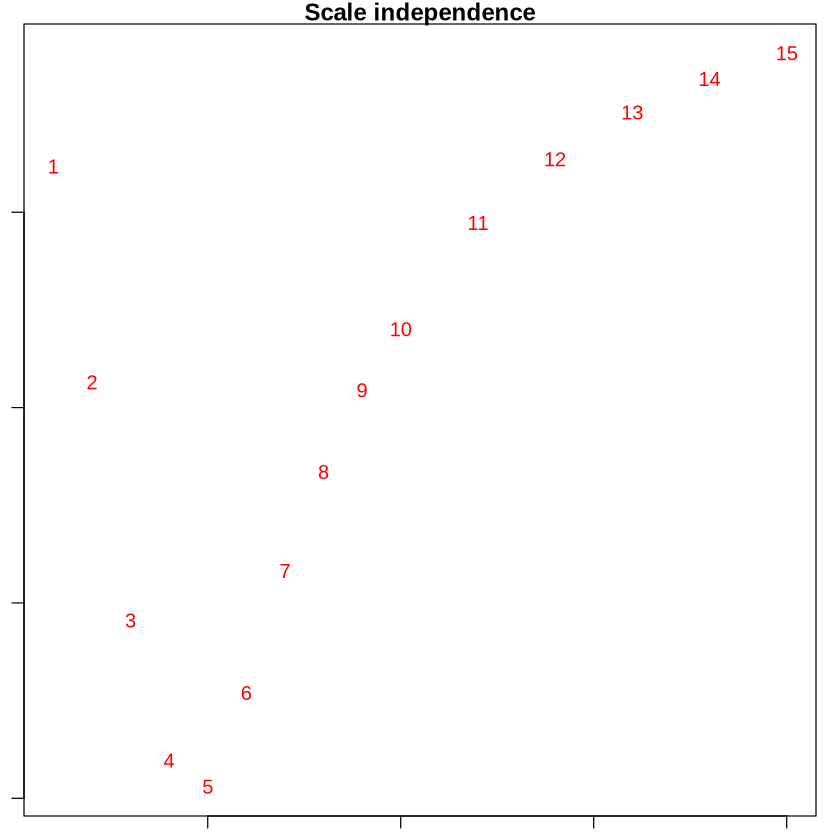

In [457]:
# Start PNG device
# png("plot_r2_softthreshold.png", width = 600, height = 800, res = 900)

par(mar=c(1,1,1,1))
plot(spt$fitIndices[,1],spt$fitIndices[,2],
xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
main = paste("Scale independence"))
text(spt$fitIndices[,1],spt$fitIndices[,2],col="red")
abline(h=0.80,col="red")

# dev.off()

In [355]:
# Plot mean connectivity as a function of soft thresholds

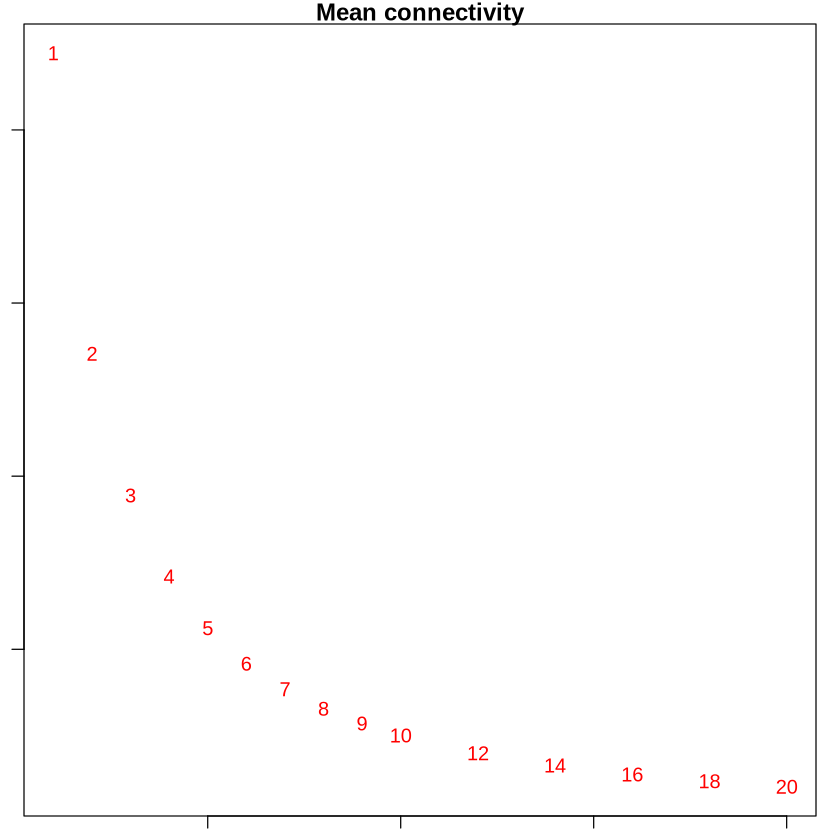

In [427]:
# Start PNG device
# png("plot_mean_connectivity_softthreshold.png", width = 600, height = 800, res = 900)

par(mar=c(1,1,1,1))
plot(spt$fitIndices[,1], spt$fitIndices[,5],
xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
main = paste("Mean connectivity"))
text(spt$fitIndices[,1], spt$fitIndices[,5], labels= spt$fitIndices[,1],col="red")


In [85]:
# You can determine the soft power threshold should be set to 6 as it is the spt that retains the highest mean connectivity while reaching an 𝑅2 value above 0.80.

### Calling the Adjacency Function

In [23]:
softPower <- 20
adjacency <- adjacency(expression.data, power = softPower, type = "signed", corFnc = "cor")

In [24]:
head(adjacency)

GSTM1        CARTPT       MIR3976HG    LINC02263    PVALB       
GSTM1     1.000000e+00 5.045212e-13 1.903733e-05 9.432445e-07 1.034510e-05
CARTPT    5.045212e-13 1.000000e+00 4.135277e-09 6.140359e-06 2.009001e-06
MIR3976HG 1.903733e-05 4.135277e-09 1.000000e+00 4.448904e-02 2.313024e-02
LINC02263 9.432445e-07 6.140359e-06 4.448904e-02 1.000000e+00 1.240376e-02
PVALB     1.034510e-05 2.009001e-06 2.313024e-02 1.240376e-02 1.000000e+00
LINC00507 1.123529e-09 3.530887e-04 1.251768e-01 3.970830e-02 1.655442e-02
          LINC00507    LINC01164    CTXN3        ROS1         SLC27A6      ⋯
GSTM1     1.123529e-09 2.504145e-05 3.879424e-09 3.751519e-07 1.524831e-06 ⋯
CARTPT    3.530887e-04 1.075067e-05 6.658660e-04 1.402935e-04 2.297567e-15 ⋯
MIR3976HG 1.251768e-01 2.740533e-04 3.498268e-03 1.716751e-01 2.645072e-08 ⋯
LINC02263 3.970830e-02 3.985833e-05 1.467539e-02 1.281681e-01 2.244934e-11 ⋯
PVALB     1.655442e-02 1.425293e-05 2.737721e-01 1.257616e-01 2.175064e-07 ⋯
LINC00507 1.000000e+00 1.804916e-03 7.552310e-02 4.260441e-01 5.123686e-13 ⋯
          UNC5C        NRF1         AP2A2        SPPL2A       C14orf93    
GSTM1     3.178686e-08 3.451406e-03 6.108605e-04 2.214353e-09 4.556577e-04
CARTPT    1.400887e-08 7.277801e-07 3.549098e-07 1.044662e-03 2.426320e-09
MIR3976HG 8.207783e-09 9.166184e-12 1.148339e-04 8.032314e-22 1.873755e-16
LINC02263 1.628717e-06 1.350047e-10 2.343169e-05 5.612673e-14 5.346667e-13
PVALB     4.804805e-05 3.918106e-05 6.874791e-07 4.637158e-24 8.115460e-21
LINC00507 2.472403e-08 2.355212e-12 1.792240e-06 9.440904e-14 1.650224e-21
          ENAH         ADAM10       RERE         WDR12        HP1BP3      
GSTM1     3.804616e-17 6.845907e-12 4.129392e-04 1.546072e-08 2.351577e-06
CARTPT    1.619500e-03 7.493201e-06 1.202970e-05 3.860181e-08 1.724622e-06
MIR3976HG 2.356432e-13 2.080748e-15 1.214461e-04 4.802344e-03 3.586307e-21
LINC02263 8.389893e-08 9.805323e-11 1.409309e-07 6.773866e-03 1.015433e-13
PVALB     3.261310e-14 8.174309e-11 1.057510e-03 1.590316e-01 1.358384e-17
LINC00507 7.093388e-08 9.897082e-11 3.502090e-05 3.572874e-03 3.297632e-17

In [17]:
data <- read.csv("~/rnaseq_synapse/rnaseq_meta_rf_5k_sep_16_with_clusters.csv", 
                 stringsAsFactors = FALSE, 
                 header = TRUE, 
                 check.names = FALSE)

In [20]:
head(data)

specimenID              individualID          diagnosis tissue clusters race
1 hB_RNA_4411             AMPAD_MSSM_0000077445 1         5      5_3      1   
2 hB_RNA_12484            AMPAD_MSSM_0000034015 1         4      4_1      1   
3 hB_RNA_16295            AMPAD_MSSM_0000083367 1         5      5_2      1   
4 BM_10_674               AMPAD_MSSM_0000098979 1         4      4_3      1   
5 hB_RNA_16665            AMPAD_MSSM_0000034450 1         5      5_3      1   
6 hB_RNA_8175_resequenced AMPAD_MSSM_0000007155 1         8      8_4      1   
  spanish apoe4_allele sex batch ⋯ UNC5C      NRF1        AP2A2      
1 2       1            1   14    ⋯ 0.07743231  0.02307060  0.25074521
2 2       1            1   20    ⋯ 0.07960425 -0.09249309 -0.26829474
3 2       0            0    5    ⋯ 0.05909812 -0.06512533 -0.02454365
4 2       0            1   21    ⋯ 0.05331877  0.05108872  0.24311266
5 2       0            1    6    ⋯ 0.16379748 -0.02355888  0.14214085
6 2       0            0    4    ⋯ 0.51326200 -0.06232626 -0.21818077
  SPPL2A      C14orf93   ENAH      ADAM10      RERE         WDR12     
1 -0.04859752  0.1515513 0.1216764  0.07214198  0.052825846 -0.3014145
2  0.20141534  0.2654496 0.2103550  0.17948028 -0.062119580  0.1584895
3  0.17925791 -0.1936485 0.2211932  0.13973787  0.007241715 -0.2165914
4 -0.01372899  0.0766796 0.0409738 -0.07528049  0.117739569 -0.2202803
5  0.08171365  0.2994822 0.2045155  0.03474415  0.028201060 -0.2440577
6  0.26628569  0.5883144 0.4661110  0.28863678 -0.122664014 -0.4278913
  HP1BP3     
1 -0.02255873
2  0.11085911
3 -0.03754560
4  0.29706882
5  0.04358792
6  0.11429364

In [18]:
gwas_genes = c('HBEGF', 'FUS', 'GPNMB', 'NFIC', 'TRIP4', 'PILRA', 'USP6NL', 'MS4A6A', 'ERN1', 'CDH23', 'KCNQ5', 'RABEP1', 'SNCA', 'ACE', 'APH1B', 'BLOC1S3', 'TACR3', 'IL34', 'KCNN4', 'CYP11A1', 'SLC24A4', 'WWOX', 'AP4M1', 'DSG2', 'MLH3', 'VCAM1', 'NDUFAF6', 'IQCK', 'PLCG2', 'CASP7', 'PSEN1', 'TBC1D7', 'BIN1', 'SORL1', 'AP2A1', 'PTK2B', 'CNTNAP2', 'NSF', 'ABCA7', 'TREML2', 'ZNF423', 'PICALM', 'PRKD3', 'ANKRD31', 'RAB10', 'VKORC1', 'FERMT2', 'PPARGC1A', 'NME8', 'CHRNE', 'RORA', 'AP4E1', 'EPG5', 'SUOX', 'ABI3', 'ZYX', 'CD2AP', 'TP53INP1', 'APOE', 'TET2', 'CR1', 'LRRC25', 'HLA-DQA1', 'MAP1B', 'CLNK', 'TMEM106B', 'WIPI2', 'CCDC6', 'SPI1', 'ADAMTS1', 'TMEM170B', 'FNBP4', 'APOC1', 'SHARPIN', 'MS4A4A', 'PSMC3', 'CASP8', 'INPP5D', 'APP', 'CLU', 'TMEM184A', 'CD33', 'VPS53', 'PLCH1', 'UNC5C', 'NRF1', 'AP2A2', 'CNN2', 'SPPL2A', 'C14orf93', 'ENAH', 'ALPK2', 'ADAM10', 'RERE', 'WDR12', 'HP1BP3')
shap_genes = c('PLCXD2', 'KCNF1', 'LPL', 'PCYOX1L', 'CHL1', 'MPO', 'SLC6A12', 'QDPR', 'SNAP25-AS1', 'WDR76', 'BACE2', 'C2orf88', 'PRELP', 'COL21A1', 'A2ML1', 'GPRASP2', 'APLN', 'MSR1', 'RIDA', 'ANGPT2', 'APLF', 'COL24A1', 'OGN', 'FOXO4', 'MYCBPAP', 'IRS1', 'GRIK1', 'TRIM47', 'FAM106A', 'RHCE', 'BEX5', 'CRH', 'VGF', 'HS6ST1', 'GLI1', 'RRAD', 'SLC16A6', 'KCNE4', 'AQP6', 'APLNR', 'LOC116435278', 'ARL17B', 'PLPPR1', 'SLC6A9', 'SPRED3', 'PHYHD1', 'PPEF1', 'TEAD2', 'TTC23-AS1', 'MILIP', 'LINC01736', 'MT1F', 'WWTR1', 'STEAP3', 'GAD2', 'C4orf19', 'ANGPT1', 'LINC01310', 'ZBTB16', 'SLC4A11', 'SCIRT', 'HSD17B8', 'TOMM70', 'THCAT155', 'ALDH1A1', 'DDX11', 'RERG', 'SST', 'LRRC55', 'DHRS11', 'PIRT', 'COLEC12', 'CSRP1', 'MOXD1', 'SPRY4', 'IRAK2', 'LOC105376654', 'LNCOC1', 'IGSF3', 'GOLGA7B', 'GFOD1', 'GAREM2', 'FBLN2', 'NWD1', 'ENPEP', 'SMIM10L2A', 'ENOSF1', 'CHRDL1', 'NGB', 'CHST6', 'FANCE', 'HBA2', 'KCNJ10', 'SLC25A48', 'ROBO2', 'PPDPF', 'GEM', 'ST6GAL2', 'ADPGK-AS1', 'SDSL', 'MEIS3', 'DDIT4L', 'C4B', 'RBM3', 'B3GAT1-DT', 'AHNAK', 'LTF', 'SFRP2', 'SEMA3C', 'TRIP10', 'CD38', 'PLK4', 'SPATA31H1', 'SSC5D', 'A4GALT', 'DUSP4', 'SMIM10L2B', 'SLC7A2', 'CNTNAP5-DT', 'NPNT', 'RAPGEF4', 'EIF2AK3-DT', 'SCG2', 'TTTY14', 'PASK', 'NRIP2', 'MDGA1', 'CALB1', 'PADI2', 'SLC5A3', 'MDH1B', 'SAMD4A', 'GAD1', 'SH2D5', 'SLC39A11', 'DUSP6', 'KCNK9', 'INSYN2A', 'DIO2', 'PDE10A', 'GOLGA8B', 'FMOD', 'MIR9-1HG', 'DUSP1', 'ITPKB', 'PDYN', 'PTPRU', 'GMPR', 'HSPB7', 'KCNAB1', 'COL9A1', 'PRKX', 'HBB', 'FKBP5', 'EGR4', 'HBA1', 'SLCO4A1', 'ARMCX5', 'PRDM16-DT', 'PAK1', 'AGFG2', 'HSD11B2', 'APOBR', 'PTTG1IP', 'KANK2', 'SVOP', 'SCIN', 'GALR1', 'CD44', 'INHBA-AS1', 'FBN3', 'S100A4', 'TNFRSF11B', 'PCP4L1', 'PRMT8', 'JAG1', 'RALY-AS1', 'ADAMTS2', 'LINC00499', 'ITGA10', 'PFKP', 'EPCIP', 'EMP3')

In [25]:

# Find genes in gene_list not present in cor_matrix column names
missing_genes <- shap_genes[!shap_genes %in% colnames(adjacency)]
print(missing_genes)

character(0)


In [459]:
# head(adjacency)

In [460]:
# Convert the adjacency matrix to a vector (excluding the diagonal if necessary)
adjacency_vector <- as.vector(adjacency)
if (isTRUE(all.equal(diag(adjacency), rep(1, nrow(adjacency))))) {
    adjacency_vector <- adjacency_vector[-which(row(adjacency) == col(adjacency))]
}

# Calculate the percentage of values greater than 0.5
percentage_over_0_5 <- sum(adjacency_vector > 0.5) / length(adjacency_vector) * 100

# Print the percentage
print(paste("Percentage of gene connections with values > 0.5:", percentage_over_0_5, "%"))


[1] "Percentage of gene connections with values > 0.5: 0.30892 %"


In [461]:
# Flatten the matrix to a vector, excluding the diagonal
weights <- as.vector(adjacency[upper.tri(adjacency)])

# Sort the weights in increasing order to find the correct threshold for top 0.5%
sorted_weights <- sort(weights, decreasing = FALSE)

# Determine the 0.5th percentile position (the top 0.5% weights)
threshold_index <- ceiling(0.9949 * length(sorted_weights))
threshold_value <- sorted_weights[threshold_index]
print(threshold_value)

# Apply this threshold to the adjacency matrix to create a new binary matrix
binary_adjacency_matrix <- adjacency > threshold_value
binary_adjacency_matrix <- 1 * binary_adjacency_matrix

# Keep the row and column names
rownames(binary_adjacency_matrix) <- rownames(adjacency)
colnames(binary_adjacency_matrix) <- colnames(adjacency)


[1] 0.4051954


In [462]:
# head(binary_adjacency_matrix)

In [463]:
# Calculate the number of edges above the threshold
num_edges <- sum(binary_adjacency_matrix[upper.tri(binary_adjacency_matrix)])

# Calculate the total possible number of edges
num_possible_edges <- choose(nrow(adjacency), 2)

# Calculate edge density
actual_edge_density <- num_edges / num_possible_edges

# Print edge density
print(paste("The edge density of the network is:", actual_edge_density * 100, "%"))


[1] "The edge density of the network is: 0.50999799959992 %"


In [464]:
write.csv(binary_adjacency_matrix, "adj_mat_9_4.csv", row.names = TRUE)

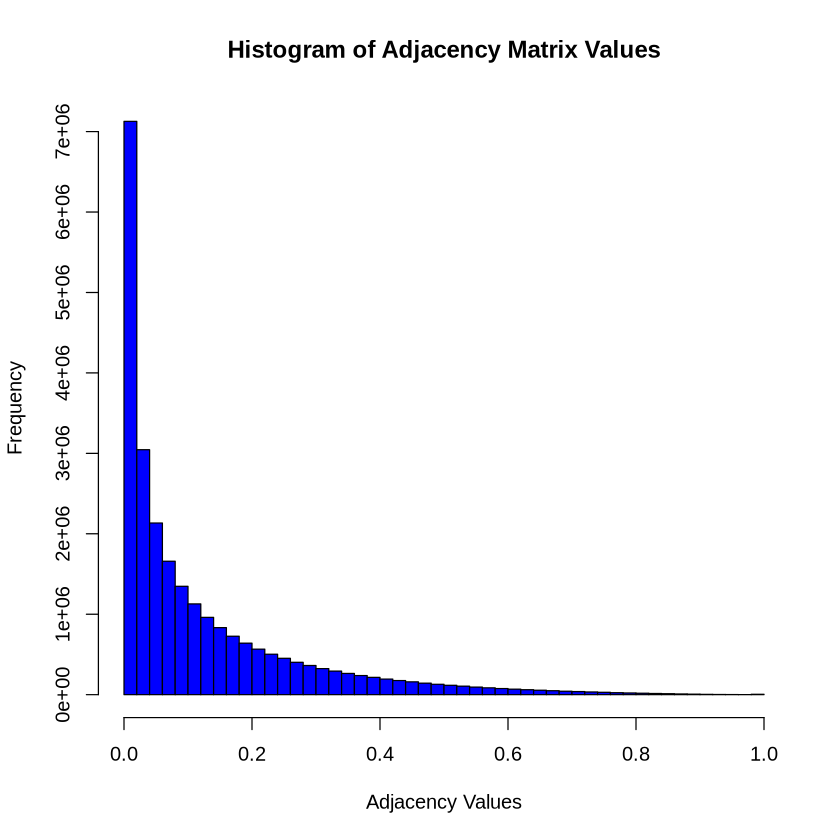

In [36]:
# Flatten the adjacency matrix to a vector
adjacency_vector <- as.vector(adjacency)
# Create a histogram of adjacency values, excluding zeros if necessary
hist(adjacency_vector[adjacency_vector != 0], main="Histogram of Adjacency Matrix Values",
     xlab="Adjacency Values", ylab="Frequency", col="blue", breaks=60)

## Complete coherent code to get adjacency matrix (sep 16)

In [4]:
data <- read.csv("~/rnaseq_synapse/rnaseq_meta_rf_5k_sep_16_with_clusters.csv", 
                 stringsAsFactors = FALSE, 
                 header = TRUE, 
                 check.names = FALSE)

In [151]:
# Set the first column as row names (index)
rownames(data) <- data[,1]
# Optionally, you can remove the first column if it's no longer needed as a separate data column
data1 <- data[,-1]

# Subset rows where the cluster column has the value '1_1'
data_subset <- data1[data1$clusters == "9_4", ]

# Remove the first 18 columns from the subset
expression.data <- data_subset[,-(1:19)]

spt <- pickSoftThreshold(expression.data)

   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1   0.6510  5.590          0.977  1880.0    1900.0 2280.0
2      2   0.4250  2.030          0.960   995.0    1000.0 1390.0
3      3   0.1830  0.890          0.956   615.0     616.0  968.0
4      4   0.0398  0.329          0.962   417.0     414.0  724.0
5      5   0.0104 -0.148          0.963   300.0     294.0  568.0
6      6   0.1050 -0.457          0.969   226.0     220.0  462.0
7      7   0.2260 -0.684          0.979   176.0     169.0  386.0
8      8   0.3290 -0.854          0.983   140.0     134.0  329.0
9      9   0.4100 -0.999          0.985   114.0     108.0  284.0
10    10   0.4770 -1.090          0.991    94.7      88.7  249.0
11    12   0.5860 -1.270          0.994    67.9      62.3  196.0
12    14   0.6490 -1.400          0.996    50.7      45.6  160.0
13    16   0.7020 -1.520          0.985    39.2      34.6  134.0
14    18   0.7340 -1.600          0.983    31.1      26.9  114.0
15    20   0.7580 -1.660 

In [152]:
softPower <- 20
adjacency <- adjacency(expression.data, power = softPower, type = "signed", corFnc = "cor")

In [153]:
# Flatten the matrix to a vector, excluding the diagonal
weights <- as.vector(adjacency[upper.tri(adjacency)])

# Sort the weights in increasing order to find the correct threshold for top 0.5%
sorted_weights <- sort(weights, decreasing = FALSE)

# Determine the 0.5th percentile position (the top 0.5% weights)
threshold_index <- ceiling(0.9948 * length(sorted_weights))
threshold_value <- sorted_weights[threshold_index]
print(threshold_value)

# Apply this threshold to the adjacency matrix to create a new binary matrix
binary_adjacency_matrix <- adjacency > threshold_value
binary_adjacency_matrix <- 1 * binary_adjacency_matrix

# Keep the row and column names
rownames(binary_adjacency_matrix) <- rownames(adjacency)
colnames(binary_adjacency_matrix) <- colnames(adjacency)

[1] 0.419551


In [154]:
write.csv(binary_adjacency_matrix, "adj_mat_9_4.csv", row.names = TRUE)

Module Construction

In [ ]:
# In order to utilize the clustering functions in R you must transform the adjacency matrix into measures of gene dissimilarity (distance of a gene from every other gene in the system).

## Shortest path -- Did not work. I did it on Venus via python

## Testing

In [40]:
# checking how many of the shao and gwas genes are in the rnaseq
df <- read.csv("~/rnaseq_synapse/rnaseq_meta_rf_5k_aug27_with_clusters.csv", stringsAsFactors = FALSE, header = TRUE)

head(df)

specimenID              individualID          diagnosis tissue clusters race
1 hB_RNA_4411             AMPAD_MSSM_0000077445 1         5      5_3      1   
2 hB_RNA_12484            AMPAD_MSSM_0000034015 1         4      4_1      1   
3 hB_RNA_16295            AMPAD_MSSM_0000083367 1         5      5_2      1   
4 BM_10_674               AMPAD_MSSM_0000098979 1         4      4_3      1   
5 hB_RNA_16665            AMPAD_MSSM_0000034450 1         5      5_3      1   
6 hB_RNA_8175_resequenced AMPAD_MSSM_0000007155 1         8      8_4      1   
  spanish apoe4_allele sex batch ⋯ GJB6       CCDC183.AS1 KLF15     
1 2       1            1   14    ⋯ -0.5918481  0.1421893   0.3715628
2 2       1            1   20    ⋯  0.2144119 -0.1874300  -0.1562918
3 2       0            0    5    ⋯  0.1012551 -0.1341097   0.1381743
4 2       0            1   21    ⋯  0.3072139  0.8534685   0.2422292
5 2       0            1    6    ⋯ -0.1736833  0.5193551   0.3478387
6 2       0            0    4    ⋯ -1.0231071 -0.1240413   0.5540372
  AGTRAP      EZR         C2orf15    LMO2        GAREM2      ZBTB16     
1  0.05960319 0.059280736  0.2744744  0.35787408  0.15618571 -0.07422739
2 -0.19034393 0.008099647  0.2734057  0.05639715 -0.25856379 -0.29450429
3  0.27793891 0.206213176 -0.9422207  0.58921402 -0.08801004 -0.18920642
4  0.05441753 0.095695023 -0.3170635 -0.17727555  0.08823943  0.19832721
5  0.28515644 0.130551412 -0.4796950  0.28688922  0.25093751 -0.09706453
6  0.54655360 0.334571202  0.3317354  0.47768328  0.25202915  0.07828544
  SDSL       
1 -0.27744252
2 -0.40400176
3 -0.17878977
4  0.01050147
5 -0.09411754
6  0.26335226

In [45]:
gene_list1 <- c('KCNK9', 'DDX11', 'SVOP', 'STEAP3', 'B3GAT1-DT', 'NPNT', 'VGF', 'EGR4', 'DUSP6', 'MOXD1', 'INSYN2A', 'APLN', 'SLC39A11', 'PPEF1', 'SEMA3C', 'KCNJ10', 'ALDH1A1', 'TRIP10', 'TNFRSF11B', 'LOC105376654', 'GRIK1', 'SLC16A6', 'CD38', 'SCIRT', 'SLC6A12', 'RALY-AS1', 'ENPEP', 'RIDA', 'PLCXD2', 'PHYHD1', 'SPRED3', 'RHCE', 'WDR76', 'NWD1', 'ANGPT1', 'APOBR', 'APLF', 'RERG', 'KANK2', 'PLK4', 'LRRC55', 'A4GALT', 'ARL17B', 'EPCIP', 'LOC116435278', 'COL21A1', 'NRIP2', 'SST', 'DUSP1', 'ENOSF1', 'SLC4A11', 'MSR1', 'HSD11B2', 'SPATA31H1', 'CSRP1', 'C4orf19', 'C4B', 'SPRY4', 'CNTNAP5-DT', 'ITGA10', 'DHRS11', 'GEM', 'FOXO4', 'ZBTB16', 'IGSF3', 'SLCO4A1', 'COL9A1', 'SCG2', 'DIO2', 'ROBO2', 'HBA2', 'CD44', 'BACE2', 'LINC01736', 'GFOD1', 'EIF2AK3-DT', 'EMP3', 'GOLGA8B', 'SFRP2', 'FKBP5', 'PIRT', 'SH2D5', 'SLC5A3', 'SLC6A9', 'LINC01310', 'MDH1B', 'COLEC12', 'BEX5', 'MPO', 'SNAP25-AS1', 'FAM106A', 'CHL1', 'KCNAB1', 'LTF', 'APLNR', 'PDE10A', 'MYCBPAP', 'PFKP', 'PRELP', 'SMIM10L2A', 'MILIP', 'RBM3', 'SAMD4A', 'CHST6', 'SLC7A2', 'ITPKB', 'ADAMTS2', 'SDSL', 'THCAT155', 'GAREM2', 'GAD2', 'NGB', 'TOMM70', 'KCNE4', 'WWTR1', 'PCYOX1L', 'MT1F', 'LPL', 'HSPB7', 'A2ML1', 'MDGA1', 'ARMCX5', 'JAG1', 'KCNF1', 'RRAD', 'ANGPT2', 'C2orf88', 'HBA1', 'FBLN2', 'PRDM16-DT', 'CHRDL1', 'PDYN', 'CRH', 'GAD1', 'AGFG2', 'HS6ST1', 'IRAK2', 'PAK1', 'SLC25A48', 'TRIM47', 'MEIS3', 'PTPRU', 'LINC00499', 'PADI2', 'AQP6', 'SCIN', 'GALR1', 'GOLGA7B', 'PRMT8', 'DUSP4', 'MIR9-1HG', 'PLPPR1', 'SMIM10L2B', 'IRS1', 'GMPR', 'AHNAK', 'GPRASP2', 'PPDPF', 'FMOD', 'OGN', 'PTTG1IP', 'COL24A1', 'TTTY14', 'TTC23-AS1', 'FBN3', 'SSC5D', 'ADPGK-AS1', 'PCP4L1', 'HBB', 'INHBA-AS1', 'HSD17B8', 'GLI1', 'ST6GAL2', 'DDIT4L', 'CALB1', 'LNCOC1', 'FANCE', 'PASK', 'TEAD2', 'RAPGEF4', 'QDPR', 'S100A4', 'PRKX')
gene_list2 <- c('CR1', 'FERMT2', 'ZNF423', 'HLA-DQA1', 'KCNQ5', 'PLCG2', 'ABCA7', 'TRIP4', 'BLOC1S3', 'WIPI2', 'VPS53', 'RORA', 'CHRNE', 'WWOX', 'TET2', 'TMEM106B', 'CDH23', 'NFIC', 'ACE', 'CD2AP', 'SORL1', 'CASP8', 'HP1BP3', 'PPARGC1A', 'CNTNAP2', 'SPPL2A', 'CLU', 'AP4E1', 'RAB10')  # Example GWAS genes

In [44]:
# Check missing genes in each list
missing_genes1 <- setdiff(gene_list1, colnames(df))
missing_genes2 <- setdiff(gene_list2, colnames(df))

# Print the number and the names of missing genes
cat("Number of missing genes from list 1:", length(missing_genes1), "\n")
cat("Missing genes from list 1:", paste(missing_genes1, collapse=", "), "\n\n")

cat("Number of missing genes from list 2:", length(missing_genes2), "\n")
cat("Missing genes from list 2:", paste(missing_genes2, collapse=", "), "\n")


Number of missing genes from list 1: 49 
Missing genes from list 1: B3GAT1-DT, DUSP6, SLC39A11, SLC6A12, RALY-AS1, RIDA, SPRED3, WDR76, KANK2, C4orf19, CNTNAP5-DT, DHRS11, FOXO4, COL9A1, ROBO2, BACE2, EIF2AK3-DT, FKBP5, SH2D5, SLC5A3, MDH1B, COLEC12, SNAP25-AS1, CHL1, SMIM10L2A, RBM3, SAMD4A, TOMM70, A2ML1, MDGA1, JAG1, PRDM16-DT, CHRDL1, AGFG2, HS6ST1, IRAK2, PRMT8, MIR9-1HG, IRS1, PPDPF, TTC23-AS1, ADPGK-AS1, INHBA-AS1, HSD17B8, ST6GAL2, LNCOC1, FANCE, QDPR, PRKX 

Number of missing genes from list 2: 23 
Missing genes from list 2: FERMT2, ZNF423, HLA-DQA1, ABCA7, TRIP4, BLOC1S3, WIPI2, VPS53, RORA, WWOX, TET2, TMEM106B, CDH23, NFIC, CD2AP, SORL1, CASP8, HP1BP3, PPARGC1A, SPPL2A, CLU, AP4E1, RAB10 


In [4]:
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [12]:
summary <- read.csv("~/rnaseq_synapse/summary_shap_gwas_sep_8.csv", header = TRUE)

In [13]:
head(summary)

Cluster Study  Samples.in.Cluster Unique.Individuals Common.SHAP.Genes.Count
1 1_1     ROSMAP  4                  4                 46                     
2 1_2     ROSMAP 18                 18                 21                     
3 1_3     ROSMAP 11                 11                 18                     
4 1_4     ROSMAP 21                 21                 12                     
5 2_1     MAYO    7                  7                 28                     
6 2_2     MAYO    4                  4                 56                     
  Common.SHAP.Genes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1 ['SLC7A2', 'NWD1', 'LPL', 'SLC5A3', 'EMP3', 'LOC116435278', 'KCNJ10', 'LINC01736', 'GOLGA8B', 'MEIS3', 'CNTNAP5-DT', 'ADPGK-AS1', 'ARL17B', 'PCYOX1L', 'A2ML1', 'DHRS11', 'SMIM10L2A', 'EIF2AK3-DT', 'PPDPF', 'C2orf88', 'ZBTB16', 'WDR76', 'ENOSF1', 'COL9A1', 'PLPPR1', 'ADAMTS2', 'HBA2', 'APLN', 'HBB', 'HBA1', 'SLC16A6', 'IGSF3', 'MT1F', 'KANK2', 'PIRT', 'SLC6A9', 'EPCIP', 'IRS1', 'SLC25A48', 'ANGPT1', 'PFKP', 'GLI1', 'SMIM10L2B', 'AQP6', 'S100A4', 'PRMT8']                                                                                           
2 ['SLC5A3', 'TRIP10', 'LINC01736', 'GAREM2', 'B3GAT1-DT', 'PCYOX1L', 'A2ML1', 'ROBO2', 'SPRED3', 'SLC4A11', 'VGF', 'SVOP', 'MDGA1', 'CSRP1', 'ITGA10', 'KANK2', 'MDH1B', 'SLC25A48', 'RBM3', 'SMIM10L2B', 'S100A4']                                                                                                                                                                                                                                                                                                                                                  
3 ['KANK2', 'A2ML1', 'SVOP', 'ITPKB', 'CSRP1', 'SLC6A12', 'KCNJ10', 'TRIP10', 'SPRED3', 'GAREM2', 'PRELP', 'IGSF3', 'SSC5D', 'PCP4L1', 'SMIM10L2B', 'AQP6', 'S100A4', 'VGF']                                                                                                                                                                                                                                                                                                                                                                                          
4 ['KANK2', 'DUSP1', 'A2ML1', 'PIRT', 'SLC5A3', 'EPCIP', 'SLC25A48', 'TRIP10', 'ST6GAL2', 'SSC5D', 'B3GAT1-DT', 'VGF']                                                                                                                                                                                                                                                                                                                                                                                                                                                
5 ['SLC7A2', 'NWD1', 'AHNAK', 'SLC5A3', 'APLNR', 'GMPR', 'TRIP10', 'KCNJ10', 'PHYHD1', 'SLCO4A1', 'SSC5D', 'SNAP25-AS1', 'PRKX', 'SLC6A12', 'BEX5', 'FKBP5', 'SLC4A11', 'VGF', 'DUSP1', 'SVOP', 'TEAD2', 'KANK2', 'PIRT', 'NRIP2', 'SLC25A48', 'PRELP', 'ANGPT1', 'RBM3']                                                                                                                                                                                                                                                                                             
6 ['SLC7A2', 'GPRASP2', 'AHNAK', 'THCAT155', 'NWD1', 'SLC5A3', 'EMP3', 'SAMD4A', 'KCNJ10', 'TRIP10', 'LINC01736', 'GAREM2', 'SLCO4A1', 'MEIS3',

In [ ]:
gene_list <- c('PICALM', 'CR1', 'MAP1B', 'BIN1', 'TMEM170B', 'ZNF423', 'KCNQ5', 'SNCA', 'ABI3', 'PLCG2', 'GPNMB', 'AP2A1', 'RORA', 'CHRNE', 'WWOX', 'NDUFAF6', 'TET2', 'CDH23', 'NFIC', 'ACE', 'NME8', 'TP53INP1', 'SPI1', 'CASP8', 'PPARGC1A', 'UNC5C', 'CNTNAP2', 'INPP5D', 'EPG5', 'SPPL2A', 'RABEP1')  # Example gene list


# Find genes in gene_list not present in cor_matrix column names
missing_genes <- gene_list[!gene_list %in% colnames(summary)]
print(missing_genes)

In [15]:
cor_matrix <- read.csv("~/rnaseq_synapse/adj_mat_1_2.csv", header = TRUE)

In [47]:
cor_matrix

GSTM1 CARTPT MIR3976HG LINC02263 PVALB LINC00507 LINC01164 CTXN3
GSTM1        1     0      0         0         0     0         0         0    
CARTPT       0     1      0         0         0     0         0         0    
MIR3976HG    0     0      1         0         0     0         0         0    
LINC02263    0     0      0         1         0     0         0         0    
PVALB        0     0      0         0         1     0         0         0    
LINC00507    0     0      0         0         0     1         0         0    
LINC01164    0     0      0         0         0     0         1         0    
CTXN3        0     0      0         0         0     0         0         1    
ROS1         0     0      0         0         0     0         0         0    
SLC27A6      0     0      0         0         0     0         0         0    
LINC01007    0     0      0         0         0     0         0         0    
POSTN        0     0      0         0         0     0         0         0    
LINC00898    0     0      0         0         0     0         0         0    
GPR26        0     0      0         0         0     0         0         0    
MEPE         0     0      0         0         0     0         0         0    
SLC17A6      0     0      0         0         0     0         0         0    
PENK         0     0      0         0         0     0         0         0    
DNAJC5G      0     0      0         0         0     0         0         0    
MAS1         0     0      0         0         0     0         0         0    
C6orf141     0     0      0         0         0     0         0         0    
RTP1         0     0      0         0         0     0         0         0    
LNCBRM       0     0      0         0         0     0         0         0    
PTGER3       0     0      0         0         0     0         0         0    
SERPINA5     0     0      0         0         0     0         0         0    
KLK7         0     0      0         0         0     0         0         0    
LOC124902301 0     0      0         0         0     0         0         0    
HSPB3        0     0      0         0         0     0         0         0    
PCSK1        0     0      0         0         0     0         0         0    
FREM3        0     0      0         0         0     0         0         0    
LOC124900989 0     0      0         0         0     0         0         0    
⋮            ⋮     ⋮      ⋮         ⋮         ⋮     ⋮         ⋮         ⋮    
KLKB1        0     0      0         0         0     0         0         0    
FLJ46284     0     0      0         0         0     0         0         0    
RAPGEF3      0     0      0         0         0     0         0         0    
DLL1         0     0      0         0         0     0         0         0    
EDNRA        0     0      0         0         0     0         0         0    
ACVR2B.AS1   0     0      0         0         0     0         0         0    
PKP4         0     0      0         0         0     0         0         0    
XRCC2        0     0      0         0         0     0         0         0    
ADGRD1       0     0      0         0         0     0         0         0    
LOC101927609 0     0      0         0         0     0         0         0    
VLDLR.AS1    0     0      0         0         0     0         0         0    
FBXW12       0     0      0         0         0     0         0         0    
EFNB3        0     0      0         0         0     0         0         0    
ARPP19       0     0      0         0         0     0         0         0    
SSX2IP       0     0      0         0         0     0         0         0    
PLPP3        0     0      0         0         0     0         0         0    
TAS2R5       0     0      0         0         0     0         0         0    
PLOD1        0     0      0         0         0     0         0         0    
SFMBT2       0     0      0         0         0     0         0         0    
MIRLET7IHG   0     0      0        

In [46]:
# Check missing genes in each list
missing_genes1 <- setdiff(gene_list1, colnames(cor_matrix))
missing_genes2 <- setdiff(gene_list2, colnames(cor_matrix))

# Print the number and the names of missing genes
cat("Number of missing genes from list 1:", length(missing_genes1), "\n")
cat("Missing genes from list 1:", paste(missing_genes1, collapse=", "), "\n\n")

cat("Number of missing genes from list 2:", length(missing_genes2), "\n")
cat("Missing genes from list 2:", paste(missing_genes2, collapse=", "), "\n")


Number of missing genes from list 1: 10 
Missing genes from list 1: B3GAT1-DT, RALY-AS1, CNTNAP5-DT, EIF2AK3-DT, SNAP25-AS1, PRDM16-DT, MIR9-1HG, TTC23-AS1, ADPGK-AS1, INHBA-AS1 

Number of missing genes from list 2: 22 
Missing genes from list 2: FERMT2, ZNF423, HLA-DQA1, ABCA7, TRIP4, BLOC1S3, WIPI2, VPS53, RORA, WWOX, TET2, TMEM106B, NFIC, CD2AP, SORL1, CASP8, HP1BP3, PPARGC1A, SPPL2A, CLU, AP4E1, RAB10 


In [16]:
# Set the first column as row names
rownames(cor_matrix) <- cor_matrix[, 1]

# Remove the first column from the matrix
cor_matrix <- cor_matrix[, -1]

In [17]:
head(cor_matrix)

GSTM1 CARTPT MIR3976HG LINC02263 PVALB LINC00507 LINC01164 CTXN3 ROS1
GSTM1     1     0      0         0         0     0         0         0     0   
CARTPT    0     1      0         0         0     0         0         0     0   
MIR3976HG 0     0      1         0         0     0         0         0     0   
LINC02263 0     0      0         1         0     0         0         0     0   
PVALB     0     0      0         0         1     0         0         0     0   
LINC00507 0     0      0         0         0     1         0         0     0   
          SLC27A6 ⋯ ATP10A STRBP GPER1 KIF26A TMEM182 JAG1 GPD1L SOX2 MTMR10
GSTM1     0       ⋯ 0      0     0     0      0       0    0     0    0     
CARTPT    0       ⋯ 0      0     0     0      0       0    0     0    0     
MIR3976HG 0       ⋯ 0      0     0     0      0       0    0     0    0     
LINC02263 0       ⋯ 0      0     0     0      0       0    0     0    0     
PVALB     0       ⋯ 0      0     0     0      0       0    0     0    0     
LINC00507 0       ⋯ 0      0     0     0      0       0    0     0    0     
          DSC2
GSTM1     0   
CARTPT    0   
MIR3976HG 0   
LINC02263 0   
PVALB     0   
LINC00507 0

In [25]:
print(colnames(cor_matrix))

   [1] "GSTM1"           "CARTPT"          "MIR3976HG"       "LINC02263"      
   [5] "PVALB"           "LINC00507"       "LINC01164"       "CTXN3"          
   [9] "ROS1"            "SLC27A6"         "LINC01007"       "POSTN"          
  [13] "LINC00898"       "GPR26"           "MEPE"            "SLC17A6"        
  [17] "PENK"            "DNAJC5G"         "MAS1"            "C6orf141"       
  [21] "RTP1"            "LNCBRM"          "PTGER3"          "SERPINA5"       
  [25] "KLK7"            "LOC124902301"    "HSPB3"           "PCSK1"          
  [29] "FREM3"           "LOC124900989"    "CBLN4"           "CBLN2"          
  [33] "LOC105369302"    "PART1"           "TRIM54"          "TNNT2"          
  [37] "MME"             "CNGB1"           "ASB2"            "TDO2"           
  [41] "BMP3"            "TYRP1"           "EPIC1"           "LINC02714"      
  [45] "CCK"             "INSRR"           "LINC00326"       "LINC02607"      
  [49] "FGF5"            "TESPA1"          "MT1H"   

In [31]:
# Find genes in gene_list not present in cor_matrix column names
missing_genes <- gene_list[!gene_list %in% colnames(cor_matrix)]
print(missing_genes)

 [1] "PICALM"   "BIN1"     "TMEM170B" "ZNF423"   "AP2A1"    "RORA"    
 [7] "WWOX"     "NDUFAF6"  "TET2"     "NFIC"     "NME8"     "TP53INP1"
[13] "CASP8"    "PPARGC1A" "UNC5C"    "EPG5"     "SPPL2A"   "RABEP1"  


In [30]:
gene_list <- c('PICALM', 'CR1', 'MAP1B', 'BIN1', 'TMEM170B', 'ZNF423', 'KCNQ5', 'SNCA', 'ABI3', 'PLCG2', 'GPNMB', 'AP2A1', 'RORA', 'CHRNE', 'WWOX', 'NDUFAF6', 'TET2', 'CDH23', 'NFIC', 'ACE', 'NME8', 'TP53INP1', 'SPI1', 'CASP8', 'PPARGC1A', 'UNC5C', 'CNTNAP2', 'INPP5D', 'EPG5', 'SPPL2A', 'RABEP1')  # Example gene list


# Subset the correlation matrix
sub_matrix <- cor_matrix[gene_list, gene_list]

# Count the number of 1s in each row (or column)
count_ones_per_gene <- colSums(sub_matrix == 1)

print(count_ones_per_gene)

ERROR: Error in `[.data.frame`(cor_matrix, gene_list, gene_list): undefined columns selected


In [19]:
summary(cor_matrix.shape

ERROR: Error in cor_matrix.shape(): could not find function "cor_matrix.shape"


In [9]:
shap_genes <- c('SLC5A3')  # Example SHAP genes
#  'TRIP10', 'LINC01736', 'GAREM2', 'B3GAT1-DT', 'PCYOX1L', 'A2ML1', 'ROBO2', 'SPRED3', 'SLC4A11', 'VGF', 'SVOP', 'MDGA1', 'CSRP1', 'ITGA10', 'KANK2', 'MDH1B', 'SLC25A48', 'RBM3', 'SMIM10L2B', 'S100A4'
gwas_genes <- c('PICALM', 'CR1', 'MAP1B', 'BIN1', 'TMEM170B', 'ZNF423', 'KCNQ5', 'SNCA', 'ABI3', 'PLCG2', 'GPNMB', 'AP2A1', 'RORA', 'CHRNE', 'WWOX', 'NDUFAF6', 'TET2', 'CDH23', 'NFIC', 'ACE', 'NME8', 'TP53INP1', 'SPI1', 'CASP8', 'PPARGC1A', 'UNC5C', 'CNTNAP2', 'INPP5D', 'EPG5', 'SPPL2A', 'RABEP1')  # Example GWAS genes

In [12]:
# required?
if (!is.matrix(cor_matrix)) {
    # Convert it to a matrix
    cor_matrix <- as.matrix(cor_matrix)
}

In [20]:
graph <- graph_from_adjacency_matrix(cor_matrix, mode = "undirected", weighted = TRUE, diag = FALSE)

In [22]:
print(summary(graph))

IGRAPH f96ca92 U-W- 1 0 -- 
+ attr: weight (e/n)
IGRAPH f96ca92 U-W- 1 0 -- 
+ attr: weight (e/n)
+ edges from f96ca92:


In [23]:
# Function to calculate and print paths only if they exist
calculate_and_print_paths <- function(graph, start_genes, end_genes) {
    for (start_gene in start_genes) {
        for (end_gene in end_genes) {
            # Check if both genes exist in the graph
            if (start_gene %in% V(graph)$name && end_gene %in% V(graph)$name) {
                # Calculate shortest path
                path <- shortest_paths(graph, from = start_gene, to = end_gene, output = "vpath")
                # Extract the path as a list of vertex names
                path_vertices <- V(graph)[path$vpath[[1]]]$name
                
                # Print results only if a valid path exists (length greater than 0)
                if (length(path_vertices) > 1) {  # Check for more than one node in the path (start and end)
                    cat(sprintf("Shortest path from %s to %s: %s\n", start_gene, end_gene, toString(path_vertices)))
                }
            }
            # Do not print anything if genes are not found or no path exists
        }
    }
}

# Call the function
calculate_and_print_paths(graph, shap_genes, gwas_genes)


Gene SLC5A3 or PICALM not found in the graph.
Gene SLC5A3 or CR1 not found in the graph.
Gene SLC5A3 or MAP1B not found in the graph.
Gene SLC5A3 or BIN1 not found in the graph.
Gene SLC5A3 or TMEM170B not found in the graph.
Gene SLC5A3 or ZNF423 not found in the graph.
Gene SLC5A3 or KCNQ5 not found in the graph.
Gene SLC5A3 or SNCA not found in the graph.
Gene SLC5A3 or ABI3 not found in the graph.
Gene SLC5A3 or PLCG2 not found in the graph.
Gene SLC5A3 or GPNMB not found in the graph.
Gene SLC5A3 or AP2A1 not found in the graph.
Gene SLC5A3 or RORA not found in the graph.
Gene SLC5A3 or CHRNE not found in the graph.
Gene SLC5A3 or WWOX not found in the graph.
Gene SLC5A3 or NDUFAF6 not found in the graph.
Gene SLC5A3 or TET2 not found in the graph.
Gene SLC5A3 or CDH23 not found in the graph.
Gene SLC5A3 or NFIC not found in the graph.
Gene SLC5A3 or ACE not found in the graph.
Gene SLC5A3 or NME8 not found in the graph.
Gene SLC5A3 or TP53INP1 not found in the graph.
Gene SLC5A3 

# WGCNA -- module detection

## Module detection

In [5]:
library(WGCNA)
library(flashClust)

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor



Attaching package: ‘flashClust’


The following object is masked from ‘package:fastcluster’:

    hclust


The following object is masked from ‘package:stats’:

    hclust




In [45]:
adjacency <- read.csv("~/rnaseq_synapse/filtered_adj_matrices/adj_mat_2_2_filt.csv", 
                 stringsAsFactors = FALSE, 
                 header = TRUE, 
                 check.names = FALSE)

In [46]:
head(adjacency)

CARTPT MIR3976HG LINC02263 PVALB LINC00507 LINC01164 CTXN3 ROS1
1 CARTPT    1      0         0         0     0         0         0     0   
2 MIR3976HG 0      1         0         0     0         0         0     0   
3 LINC02263 0      0         1         0     1         0         0     0   
4 PVALB     0      0         0         1     0         0         0     0   
5 LINC00507 0      0         1         0     1         0         0     0   
6 LINC01164 0      0         0         0     0         1         0     0   
  SLC27A6 ⋯ AP4E1 CD2AP WIPI2 CASP8 APP CLU UNC5C NRF1 ADAM10 HP1BP3
1 0       ⋯ 0     0     0     0     0   0   0     0    0      0     
2 0       ⋯ 0     0     0     0     0   0   0     0    0      0     
3 0       ⋯ 0     0     0     0     0   0   0     0    0      0     
4 0       ⋯ 0     0     0     0     0   0   0     0    0      0     
5 0       ⋯ 0     0     0     0     0   0   0     0    0      0     
6 0       ⋯ 0     0     0     0     0   0   0     0    0      0

In [47]:
# Convert all columns to numeric forcefully; non-numeric entries will become NA
adjacency[-1] <- sapply(adjacency[-1], function(x) as.numeric(as.character(x)))

# Check if there are any NAs introduced by conversion
if(any(is.na(adjacency))) {
    cat("NA's introduced during conversion, indicating non-numeric entries.\n")
    # Option to handle NAs: replace them with zeros or appropriate value
    adjacency[is.na(adjacency)] <- 0
}

# Convert the data frame to a matrix
adjacency <- as.matrix(adjacency[-1])


In [48]:
str(adjacency)

 num [1:1692, 1:1692] 1 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:1692] "CARTPT" "MIR3976HG" "LINC02263" "PVALB" ...


Topological Overlap Matrix

In [100]:

# The TOM-based dissimilarity is preferentially used over dissimilarity based on correlation coefficients 
# because TOM-based dissimilarity generates more distinct modules.

In [49]:
TOM <- TOMsimilarity(adjacency,
                    TOMDenom = 'mean')

..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [50]:
head(TOM)

[,1] [,2]      [,3]      [,4] [,5]      [,6] [,7] [,8] [,9] [,10] [,11]
[1,] 1    0.0000000 0.0000000 0    0.0000000 0    0    0    0    0     ⋯    
[2,] 0    1.0000000 0.2500000 0    0.4615385 0    0    0    0    0     ⋯    
[3,] 0    0.2500000 1.0000000 0    0.6153846 0    0    0    0    0     ⋯    
[4,] 0    0.0000000 0.0000000 1    0.0000000 0    0    0    0    0     ⋯    
[5,] 0    0.4615385 0.6153846 0    1.0000000 0    0    0    0    0     ⋯    
[6,] 0    0.0000000 0.0000000 0    0.0000000 1    0    0    0    0     ⋯    
     [,12] [,13] [,14] [,15] [,16] [,17] [,18] [,19] [,20] [,21]
[1,] 0     0     0     0     0     0     0     0     0     0    
[2,] 0     0     0     0     0     0     0     0     0     0    
[3,] 0     0     0     0     0     0     0     0     0     0    
[4,] 0     0     0     0     0     0     0     0     0     0    
[5,] 0     0     0     0     0     0     0     0     0     0    
[6,] 0     0     0     0     0     0     0     0     0     0

In [51]:
TOM.dissimilarity <- 1-TOM

Hierarchical Clustering Analysis

In [11]:
# The dissimilarity/distance measures are then clustered using linkage hierarchical clustering 
# and a dendrogram (cluster tree) of genes is constructed.

In [52]:
#creating the dendrogram 
geneTree <- hclust(as.dist(TOM.dissimilarity), method = "average")

In [106]:
# Suggestion
geneTree <- hclust(as.dist(TOM.dissimilarity), method = "ward.D2")


ERROR: Error in hclust(as.dist(TOM.dissimilarity), method = "ward.D2"): Invalid clustering method


In [13]:
str(geneTree)

List of 7
 $ merge      : int [1:654, 1:2] -136 -219 -93 -507 -150 -67 -209 -135 -133 -80 ...
 $ height     : num [1:654] 0.0638 0.0882 0.0943 0.1163 0.117 ...
 $ order      : int [1:655] 649 613 417 530 152 515 64 583 87 10 ...
 $ labels     : NULL
 $ method     : chr "average"
 $ call       : language hclust(d = as.dist(TOM.dissimilarity), method = "average")
 $ dist.method: NULL
 - attr(*, "class")= chr "hclust"


In [14]:
#plotting the dendrogram
# Did not work. needs parameters adjustment
sizeGrWindow(12,9)
plot(geneTree, xlab="", sub="", main = "Gene clustering on TOM-based dissimilarity", 
labels = FALSE, hang = 0.04)

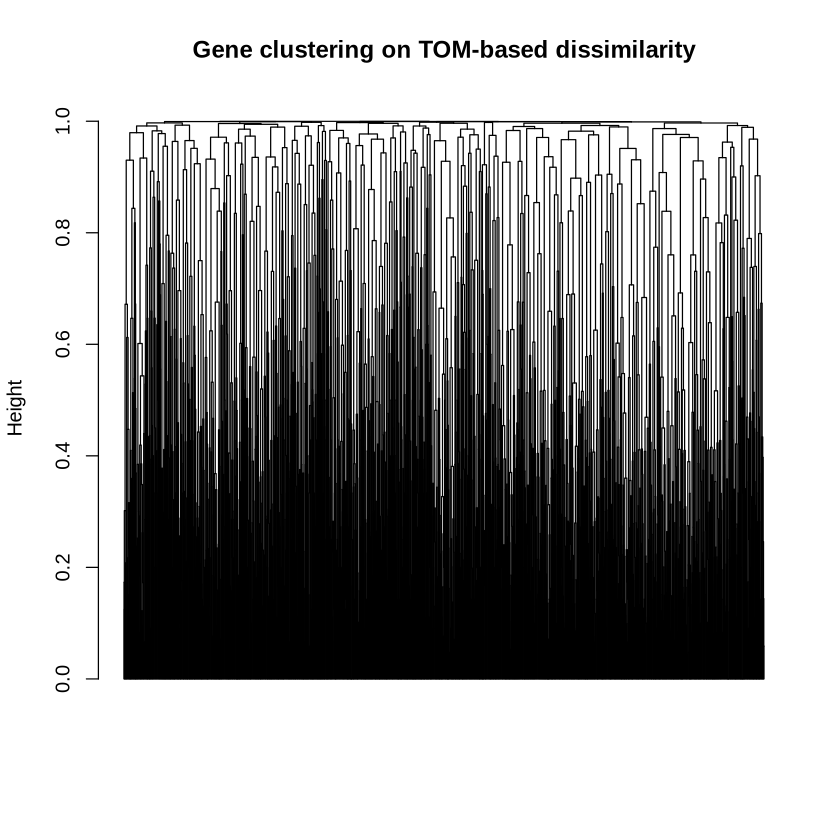

In [53]:
plot(geneTree, main="Gene clustering on TOM-based dissimilarity",
     xlab="", sub="", labels=FALSE, hang=-1)  # Setting hang to -1 can sometimes help in visibility


In [111]:
# To identify modules from this gene dendrogram, you can use the cutreeDynamic() function. 
# This will allow you to set a minimum cluster size.
# For genomic data like this it is more beneficial to set minimum module sizes relatively high as you are working with high loads of data. The authors of WGCNA recommend to start at a minClusterSize = 30.

In [54]:
Modules <- cutreeDynamic(dendro = geneTree, 
                         distM = TOM.dissimilarity,
                         method = "hybrid",
                         deepSplit = 3, 
                         pamRespectsDendro = TRUE, 
                         minClusterSize = 27)

 ..cutHeight not given, setting it to 0.991  ===>  99% of the (truncated) height range in dendro.
 ..done.


In [55]:
table(Modules) 
#returns a table of the counts of factor levels in an object. 
# In this case how many genes are assigned to each created module

Modules
 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 
81 73 72 70 68 67 65 64 62 59 56 55 55 53 52 51 49 48 46 40 39 37 35 34 34 33 
26 27 28 29 30 31 32 33 34 35 
32 32 30 30 29 29 29 28 28 27 

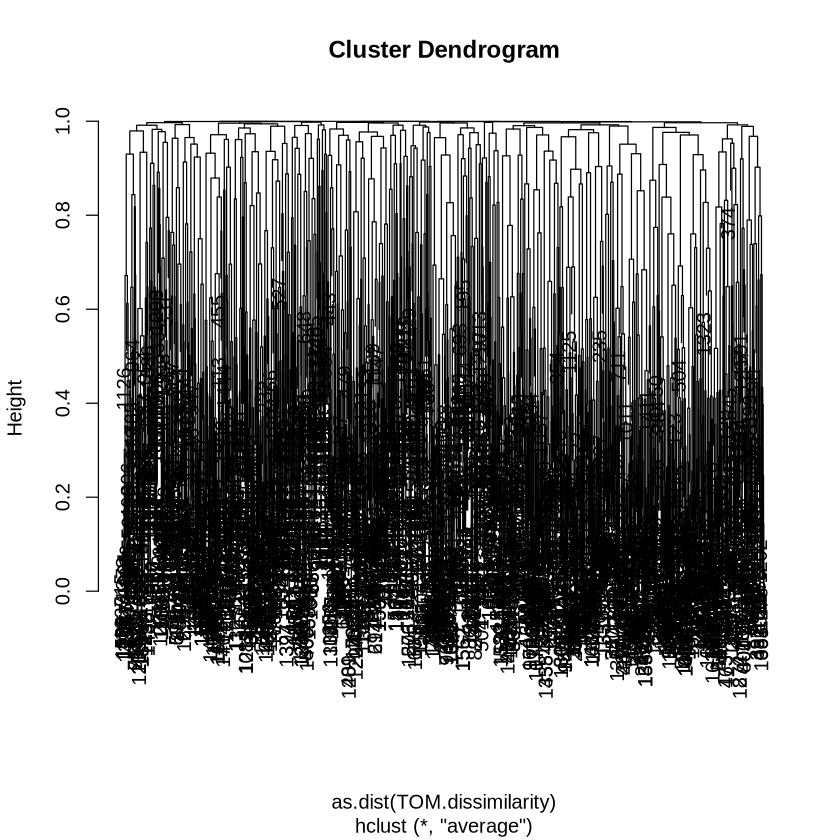

In [56]:
plot(geneTree)

In [66]:
# The Label 0 Module is reserved for unassigned genes (genes that do not fit in any module).

In [57]:
ModuleColors <- labels2colors(Modules) #assigns each module number a color
table(ModuleColors) #returns the counts for each color (aka the number of genes within each module)

ModuleColors
         black           blue          brown           cyan      darkgreen 
            64             72             70             52             35 
      darkgrey    darkmagenta darkolivegreen     darkorange        darkred 
            34             28             28             32             37 
 darkturquoise          green    greenyellow           grey         grey60 
            34             67             55             81             48 
     lightcyan     lightgreen    lightyellow        magenta   midnightblue 
            49             46             40             59             51 
        orange  paleturquoise           pink         purple            red 
            33             29             62             56             65 
     royalblue    saddlebrown         salmon        sienna3        skyblue 
            39             30             53             27             30 
     steelblue            tan      turquoise         violet          white 

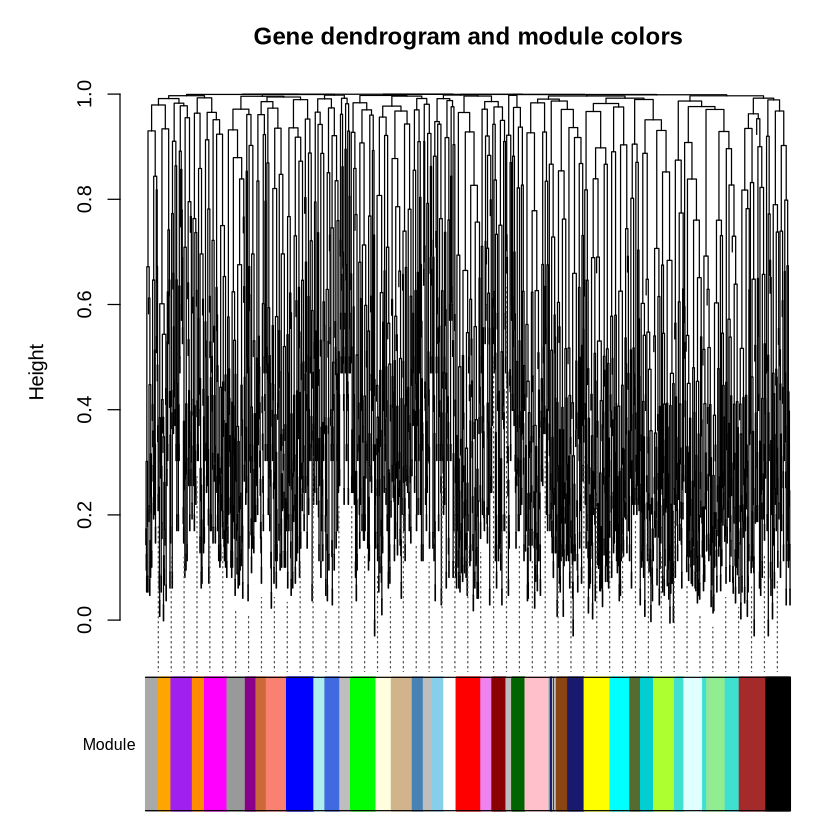

In [58]:
#plots the gene dendrogram with the module colors
plotDendroAndColors(geneTree, ModuleColors,"Module",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05,
main = "Gene dendrogram and module colors")

Module Eigengene Identification

In [ ]:
# A ME (Module Eigengene) is the standardized gene expression profile for a given module.

# To identify the Module Eigengene you can call on the expression data into the moduleEigengenes() function

In [ ]:
# Load the expression data for the cluster first

In [59]:
data <- read.csv("~/rnaseq_synapse/rnaseq_meta_rf_5k_sep_16_with_clusters.csv", 
                 stringsAsFactors = FALSE, 
                 header = TRUE, 
                 check.names = FALSE)

In [60]:
# Set the first column as row names (index)
rownames(data) <- data[,1]
# Optionally, you can remove the first column if it's no longer needed as a separate data column
data1 <- data[,-1]

# Subset rows where the cluster column has the value '1_1'
data_subset <- data1[data1$clusters == "2_2", ]

# Remove the first 18 columns from the subset
expression.data1 <- data_subset[,-(1:19)]

In [61]:
head(expression.data1)

GSTM1     CARTPT     MIR3976HG   LINC02263   PVALB      LINC00507  
1104_CBE  4.906410 -1.2867123 -1.58492667 -0.66209233  0.5418620 -0.75866408
141_CBE   3.926920  0.2904971  0.47417142  0.53221464 -0.1624353  0.49611028
834_CBE   2.633551  2.1327339  0.61262459  0.43019019  0.8113587  0.51716549
1159_CBE -5.204473 -0.6572310 -0.01319936  0.02815402  0.2049275  0.01978668
         LINC01164  CTXN3      ROS1       SLC27A6    ⋯ UNC5C       NRF1      
1104_CBE -0.3796463 0.37514995 -2.5083371 -0.8512944 ⋯  0.39487366 0.11710168
141_CBE  -0.2195320 0.01640352 -0.4735027 -0.9477244 ⋯ -0.44174410 0.06187358
834_CBE  -0.1638226 1.85673206  1.3428338  0.9298554 ⋯ -0.01765746 0.04130300
1159_CBE  0.1953680 0.42799020 -0.2775615 -0.6583676 ⋯ -0.32084253 0.17105498
         AP2A2       SPPL2A       C14orf93   ENAH      ADAM10     RERE      
1104_CBE -0.01096135 -0.032445971 -0.1236927 0.1624849 0.08150002 0.01904985
141_CBE  -0.03819119  0.077479679  0.1227743 0.2492227 0.24732115 0.05750142
834_CBE  -0.33926632 -0.003371255 -0.2786479 0.3483797 0.13394375 0.03826545
1159_CBE  0.08259784  0.070338142 -0.1656186 0.2593439 0.23258931 0.36743155
         WDR12       HP1BP3    
1104_CBE  0.01022429 0.05430879
141_CBE   0.31540710 0.38682644
834_CBE   0.34028411 0.16807427
1159_CBE -0.03716998 0.15829800

In [62]:
# Step 1: Find common column names
common_columns <- intersect(colnames(expression.data1), colnames(adjacency))

# Step 2: Subset the DataFrame to keep only common columns
expression.data <- expression.data1[, common_columns]


In [63]:
head(expression.data)

CARTPT     MIR3976HG   LINC02263   PVALB      LINC00507   LINC01164 
1104_CBE -1.2867123 -1.58492667 -0.66209233  0.5418620 -0.75866408 -0.3796463
141_CBE   0.2904971  0.47417142  0.53221464 -0.1624353  0.49611028 -0.2195320
834_CBE   2.1327339  0.61262459  0.43019019  0.8113587  0.51716549 -0.1638226
1159_CBE -0.6572310 -0.01319936  0.02815402  0.2049275  0.01978668  0.1953680
         CTXN3      ROS1       SLC27A6    LINC01007  ⋯ AP4E1      CD2AP     
1104_CBE 0.37514995 -2.5083371 -0.8512944 -1.0528731 ⋯ 0.24976167 -0.1792422
141_CBE  0.01640352 -0.4735027 -0.9477244  1.8154208 ⋯ 0.05635019 -0.1945045
834_CBE  1.85673206  1.3428338  0.9298554  0.1831312 ⋯ 0.42742032 -0.1768038
1159_CBE 0.42799020 -0.2775615 -0.6583676 -0.2926263 ⋯ 0.47530906 -0.1452770
         WIPI2       CASP8       APP         CLU        UNC5C       NRF1      
1104_CBE  0.13006795 -0.07750015  0.25076723 0.04430662  0.39487366 0.11710168
141_CBE   0.01761946  0.39281386  0.24348689 0.13980587 -0.44174410 0.06187358
834_CBE   0.11973919 -0.12119676  0.43487923 0.12317898 -0.01765746 0.04130300
1159_CBE -0.01076621 -0.07735259 -0.06242455 0.19309233 -0.32084253 0.17105498
         ADAM10     HP1BP3    
1104_CBE 0.08150002 0.05430879
141_CBE  0.24732115 0.38682644
834_CBE  0.13394375 0.16807427
1159_CBE 0.23258931 0.15829800

In [64]:
MElist <- moduleEigengenes(expression.data, 
                           colors = ModuleColors,
                           nPC=1,
                           excludeGrey = TRUE,
                           trapErrors = FALSE,
                           subHubs = TRUE) 
MEs <- MElist$eigengenes 
head(MEs)

MEblack    MEblue      MEbrown      MEcyan      MEdarkgreen
1104_CBE -0.1255065  0.17049993 -0.004792518 -0.80472075  0.3306389 
141_CBE   0.3118375  0.63487908  0.616820042 -0.01258605 -0.3388640 
834_CBE   0.5662456 -0.75164556  0.158863223  0.50423298  0.6269349 
1159_CBE -0.7525765 -0.05373345 -0.770890747  0.31307382 -0.6187097 
         MEdarkgrey    MEdarkmagenta MEdarkolivegreen MEdarkorange MEdarkred  ⋯
1104_CBE  0.3960747981 -0.20109259   -0.37558787       0.04574492  -0.5389779 ⋯
141_CBE  -0.0006579891  0.78842296    0.07337761       0.07901431   0.5598849 ⋯
834_CBE  -0.8161528624 -0.58130430    0.78666943      -0.76376457  -0.4553204 ⋯
1159_CBE  0.4207360534 -0.00602607   -0.48445917       0.63900534   0.4344134 ⋯
         MEsaddlebrown MEsalmon   MEsienna3   MEskyblue   MEsteelblue  
1104_CBE -0.36262289    0.2625668  0.35110928 -0.77035766 -0.1450740729
141_CBE  -0.47008790    0.6874647  0.48144315 -0.06501336 -0.6229469747
834_CBE   0.80418163   -0.4151366 -0.03003602  0.25428424 -0.0006727324
1159_CBE  0.02852917   -0.5348949 -0.80251642  0.58108679  0.7686937801
         MEtan      MEturquoise MEviolet    MEwhite     MEyellow  
1104_CBE -0.3355414 -0.4820167  -0.80946270 -0.63582797 -0.6244430
141_CBE  -0.6408721  0.7603486   0.42574228 -0.06807311 -0.2571876
834_CBE   0.4894882  0.1354206  -0.02014564 -0.06238656  0.7194631
1159_CBE  0.4869253 -0.4137525   0.40386607  0.76628765  0.1621675

In [65]:
# You have now identified the eigengenes for the data.

Module Merging

In [66]:
# To further condense the clusters (branches) into more meaningful modules 
# you can cluster modules based on pairwise eigengene correlations and merge the modules that have similar expression profiles.

In [67]:
# REMINDER: 
# An eigengene is the gene whose expression is representative of the the majority of genes expressed within a module.

In [68]:
ME.dissimilarity = 1-cor(MElist$eigengenes, use="complete") #Calculate eigengene dissimilarity

In [69]:
# Now, using the new found measurements of dissimilarity, you can construct a cluster tree. 
# You will also be adding a line at the height of .25. This height corresponds to a correlation of over 75%. Any branches below this line are more than 75% related, and you will thus be merging them!

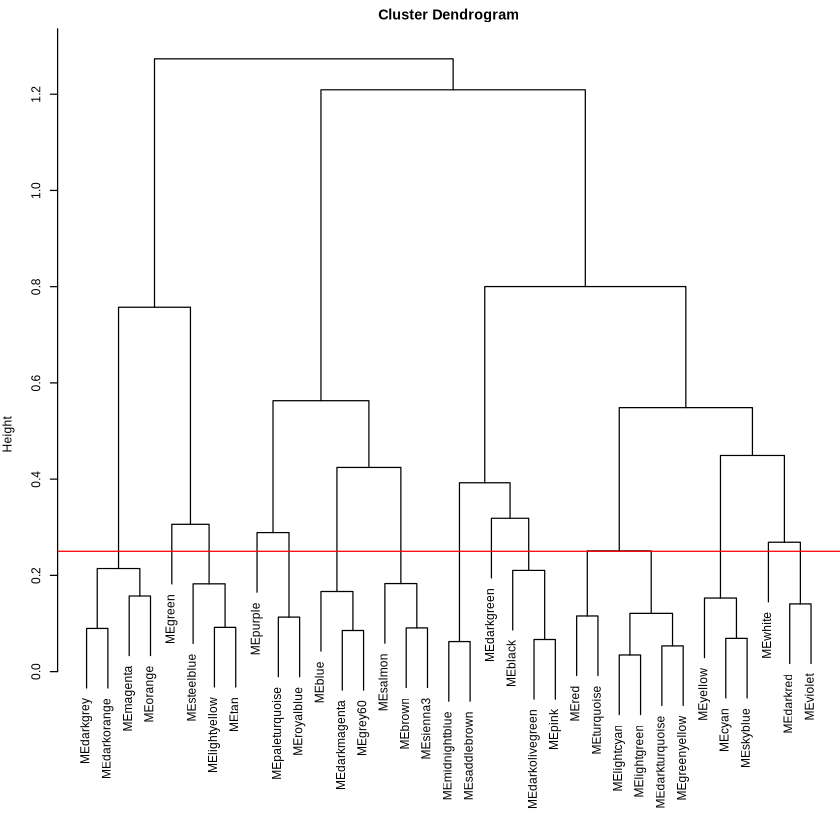

In [70]:
METree = hclust(as.dist(ME.dissimilarity), method = "average") #Clustering eigengenes 
par(mar = c(0,4,2,0)) #seting margin sizes
par(cex = 0.6);#scaling the graphic
plot(METree)
abline(h=.25, col = "red") #a height of .25 corresponds to correlation of .75

In [71]:
merge <- mergeCloseModules(expression.data, ModuleColors, cutHeight = .25)

 mergeCloseModules: Merging modules whose distance is less than 0.25
   Calculating new MEs...


In [31]:
# Did it work??

In [72]:
# The merged module colors, assigning one color to each module
mergedColors = merge$colors
# Eigengenes of the new merged modules
mergedMEs = merge$newMEs

In [90]:
head(mergedMEs)

MEblack    MEred       MEdarkred  MEwhite     MEmidnightblue
1104_CBE -0.5350614 -0.60634844 -0.6826536 -0.63582797 -0.1903609    
141_CBE   0.2443294  0.75678196  0.5208248 -0.06807311 -0.7198334    
834_CBE   0.6984256  0.08019804 -0.2723782 -0.06238656  0.5803485    
1159_CBE -0.4076936 -0.23063156  0.4342070  0.76628765  0.3298458    
         MEyellow   MEdarkgrey MEgreen     MEdarkgreen MEpaleturquoise
1104_CBE -0.7425013  0.3426841  0.46246583  0.3306389   0.7327039     
141_CBE  -0.1429146 -0.2470580 -0.82285876 -0.3388640   0.1507743     
834_CBE   0.5774048 -0.6869366  0.03172546  0.6269349  -0.2833958     
1159_CBE  0.3080111  0.5913105  0.32866748 -0.6187097  -0.6000824     
         MEpurple    MEblue      MEsalmon   MEgrey    
1104_CBE  0.63149275 -0.04199643  0.1594331  0.5938928
141_CBE   0.14447250  0.78555825  0.6548060 -0.5445539
834_CBE  -0.76166937 -0.60057388 -0.0797685  0.3933828
1159_CBE -0.01429588 -0.14298795 -0.7344707 -0.4427217

In [81]:
# The similar modules are now merged! Let’s compare them with the original modules by creating another dendrogram

In [82]:
# create a dendrogram which shows both the original AND merged module colors

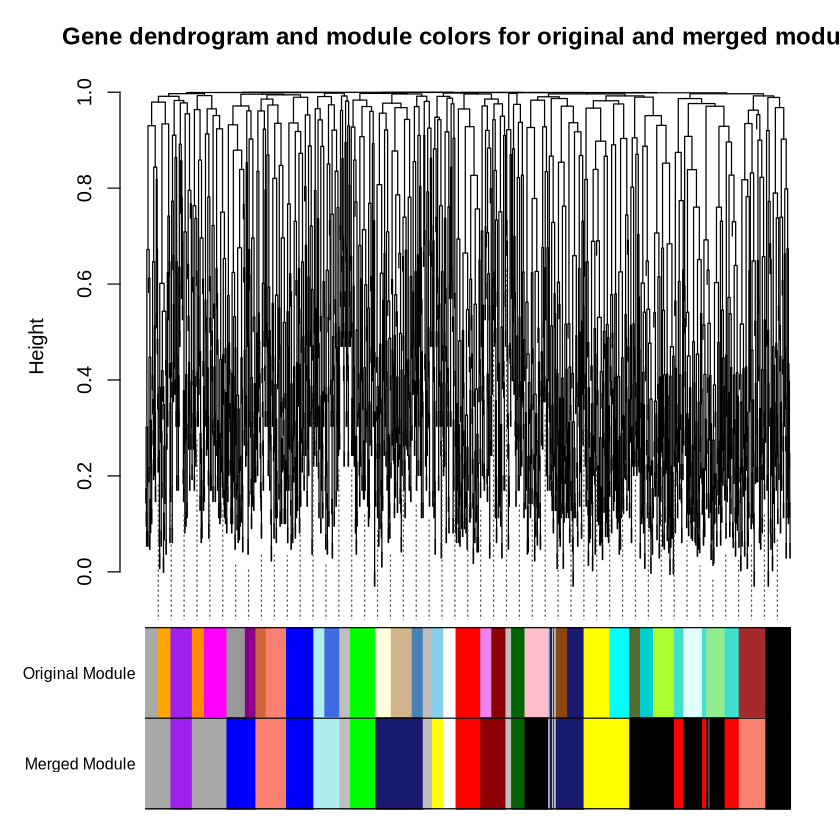

In [74]:
plotDendroAndColors(geneTree, cbind(ModuleColors, mergedColors), 
c("Original Module", "Merged Module"),
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05,
main = "Gene dendrogram and module colors for original and merged modules")

Target Gene Identification

In [ ]:
# You can use the gene significance along with the genes intramodular connectivity to identify potential target genes associated with a particular trait of interest. 

In [ ]:
# The module membership/intramodular connectivity is calculated as the correlation of the eigengene and the gene expression profile. 
# This quantifies the similarity of all genes on the array to every module.

In [75]:
# Define numbers of genes and samples
nGenes = ncol(expression.data)
nSamples = nrow(expression.data)
modNames = substring(names(mergedMEs), 3) #extract module names

In [76]:
#Calculate the module membership and the associated p-values
geneModuleMembership = as.data.frame(cor(expression.data, mergedMEs, use = "p"))
MMPvalue = as.data.frame(corPvalueStudent(as.matrix(geneModuleMembership), nSamples))
names(geneModuleMembership) = paste("MM", modNames, sep="")
names(MMPvalue) = paste("p.MM", modNames, sep="")


In [91]:
head(geneModuleMembership)

MMblack    MMred       MMdarkred   MMwhite     MMmidnightblue
CARTPT     0.9750726  0.51240062  0.06329854  0.06263157 0.409396595   
MIR3976HG  0.8004010  0.78601964  0.66243784  0.53113782 0.178491231   
LINC02263  0.8240770  0.88691375  0.66523148  0.40441515 0.002000658   
PVALB      0.2102085 -0.59386070 -0.80315481 -0.31092336 0.756216625   
LINC00507  0.8507116  0.84307065  0.62238519  0.41701160 0.090809597   
LINC01164 -0.1060102  0.01394635  0.65234714  0.99003416 0.474877443   
          MMyellow  MMdarkgrey MMgreen    MMdarkgreen MMpaleturquoise
CARTPT    0.7526781 -0.9167430 -0.3806021  0.4725703  -0.4296270     
MIR3976HG 0.8356735 -0.6238236 -0.6347868 -0.1675549  -0.7192476     
LINC02263 0.7167989 -0.6791084 -0.7686158 -0.1566363  -0.5794018     
PVALB     0.2088043 -0.2880548  0.6536592  0.8436367   0.0268726     
LINC00507 0.7703404 -0.7017194 -0.7114457 -0.1033777  -0.6180300     
LINC01164 0.6632039  0.3619844  0.1524172 -0.6533829  -0.9087313     
          MMpurple   MMblue      MMsalmon    MMgrey     
CARTPT    -0.9241955 -0.35046276  0.11531666  0.08042111
MIR3976HG -0.8013478  0.04182722  0.01067105 -0.54575807
LINC02263 -0.7132527  0.19556057  0.20029178 -0.56084177
PVALB     -0.4138226 -0.91328095 -0.32208219  0.87462361
LINC00507 -0.7746820  0.10452621  0.14313831 -0.50836983
LINC01164 -0.3555087 -0.20468214 -0.79605485 -0.61091507

In [88]:
head(MMPvalue)

p.MMblack  p.MMred   p.MMdarkred p.MMwhite   p.MMmidnightblue
CARTPT    0.02492743 0.4875994 0.9367015   0.937368426 0.5906034       
MIR3976HG 0.19959900 0.2139804 0.3375622   0.468862184 0.8215088       
LINC02263 0.17592302 0.1130863 0.3347685   0.595584852 0.9979993       
PVALB     0.78979152 0.4061393 0.1968452   0.689076639 0.2437834       
LINC00507 0.14928835 0.1569293 0.3776148   0.582988404 0.9091904       
LINC01164 0.89398984 0.9860537 0.3476529   0.009965842 0.5251226       
          p.MMyellow p.MMdarkgrey p.MMgreen p.MMdarkgreen p.MMpaleturquoise
CARTPT    0.2473219  0.0832570    0.6193979 0.5274297     0.5703730        
MIR3976HG 0.1643265  0.3761764    0.3652132 0.8324451     0.2807524        
LINC02263 0.2832011  0.3208916    0.2313842 0.8433637     0.4205982        
PVALB     0.7911957  0.7119452    0.3463408 0.1563633     0.9731274        
LINC00507 0.2296596  0.2982806    0.2885543 0.8966223     0.3819700        
LINC01164 0.3367961  0.6380156    0.8475828 0.3466171     0.0912687        
          p.MMpurple p.MMblue   p.MMsalmon p.MMgrey 
CARTPT    0.07580452 0.64953724 0.8846833  0.9195789
MIR3976HG 0.19865225 0.95817278 0.9893290  0.4542419
LINC02263 0.28674728 0.80443943 0.7997082  0.4391582
PVALB     0.58617742 0.08671905 0.6779178  0.1253764
LINC00507 0.22531803 0.89547379 0.8568617  0.4916302
LINC01164 0.64449128 0.79531786 0.2039451  0.3890849

In [ ]:
geneModuleMembership DataFrame: Contains correlation values between each gene and each module (module membership).
MMPvalue DataFrame: Contains p-values corresponding to the correlations found in geneModuleMembership.

In [87]:
# Using the module membership measures you can identify genes with high module membership in interesting modules.

In [78]:
# Function to extract top genes
# 2_2 results

getTopGenesPerModule <- function(mm_data, top_n = 5) {
    top_genes <- lapply(names(mm_data)[-1], function(module) {  # Exclude 'Gene' column
        sorted_genes <- mm_data[order(mm_data[[module]], decreasing = TRUE),, drop = FALSE]
        top_genes_info <- head(sorted_genes, n = top_n)
        return(data.frame(Module = module, Gene = rownames(top_genes_info), Correlation = top_genes_info[, module]))
    })
    do.call(rbind, top_genes)
}

# Apply function and print results
top_genes_by_module <- getTopGenesPerModule(geneModuleMembership)
print(top_genes_by_module)


            Module        Gene Correlation
1            MMred      ABCA10   0.9993731
2            MMred       PDGFD   0.9991598
3            MMred    RASGEF1C   0.9967623
4            MMred   LINC01007   0.9965897
5            MMred        SSPN   0.9964848
6        MMdarkred      ADAM10   0.9996661
7        MMdarkred     SLC17A8   0.9992418
8        MMdarkred       MDGA1   0.9942460
9        MMdarkred      NUTM2D   0.9937987
10       MMdarkred       CCL28   0.9931354
11         MMwhite     LRRC37A   0.9963831
12         MMwhite    LRRC37A2   0.9960011
13         MMwhite       GPR55   0.9957399
14         MMwhite        LST1   0.9940539
15         MMwhite     COL13A1   0.9914097
16  MMmidnightblue       IKZF1   0.9996845
17  MMmidnightblue      ABCC12   0.9996601
18  MMmidnightblue       DSCAM   0.9973892
19  MMmidnightblue        CD82   0.9971120
20  MMmidnightblue       SYT15   0.9969062
21        MMyellow       PDE3A   0.9997117
22        MMyellow     SLITRK4   0.9981359
23        M

In [38]:
#next one does the same thing but better
# 1_2 results

# Define a function to extract top 5 genes for each module
getTopGenesPerModule <- function(df, top_n = 5) {
    results <- list()
    for (module in names(df)[-1]) {  # Exclude the gene names if it's included as a column
        top_genes <- df[order(df[[module]], decreasing = TRUE), ][1:top_n, , drop = FALSE]
        results[[module]] <- data.frame(Module = module, 
                                        Gene = rownames(top_genes), 
                                        Score = top_genes[[module]])
    }
    do.call(rbind, results)
}

# Apply the function and print the results
top_genes_by_module <- getTopGenesPerModule(geneModuleMembership)
print(top_genes_by_module)


               Module    Gene     Score
MMpink.1       MMpink    SYT7 0.8815222
MMpink.2       MMpink    SVOP 0.8733513
MMpink.3       MMpink   CSMD1 0.8715260
MMpink.4       MMpink SLC35F3 0.8614852
MMpink.5       MMpink SLC12A5 0.8585524
MMblack.1     MMblack     CNP 0.9825999
MMblack.2     MMblack      TF 0.9486808
MMblack.3     MMblack  CARNS1 0.9436223
MMblack.4     MMblack   ENPP2 0.9416761
MMblack.5     MMblack     MAG 0.9259425
MMred.1         MMred    NTN1 0.9177565
MMred.2         MMred  NKAIN3 0.9160804
MMred.3         MMred HEPACAM 0.9062490
MMred.4         MMred PCDHGC3 0.8948935
MMred.5         MMred    MYLK 0.8807123
MMyellow.1   MMyellow    DGKZ 0.9577670
MMyellow.2   MMyellow   RELL2 0.8641000
MMyellow.3   MMyellow     ACE 0.8592421
MMyellow.4   MMyellow   MROH1 0.8515906
MMyellow.5   MMyellow KREMEN1 0.8489105
MMmagenta.1 MMmagenta  GABRA3 0.9001539
MMmagenta.2 MMmagenta PCDHAC1 0.8535863
MMmagenta.3 MMmagenta    NRG3 0.8291884
MMmagenta.4 MMmagenta    CMIP 0.8191232


No id variables; using all as measure variables



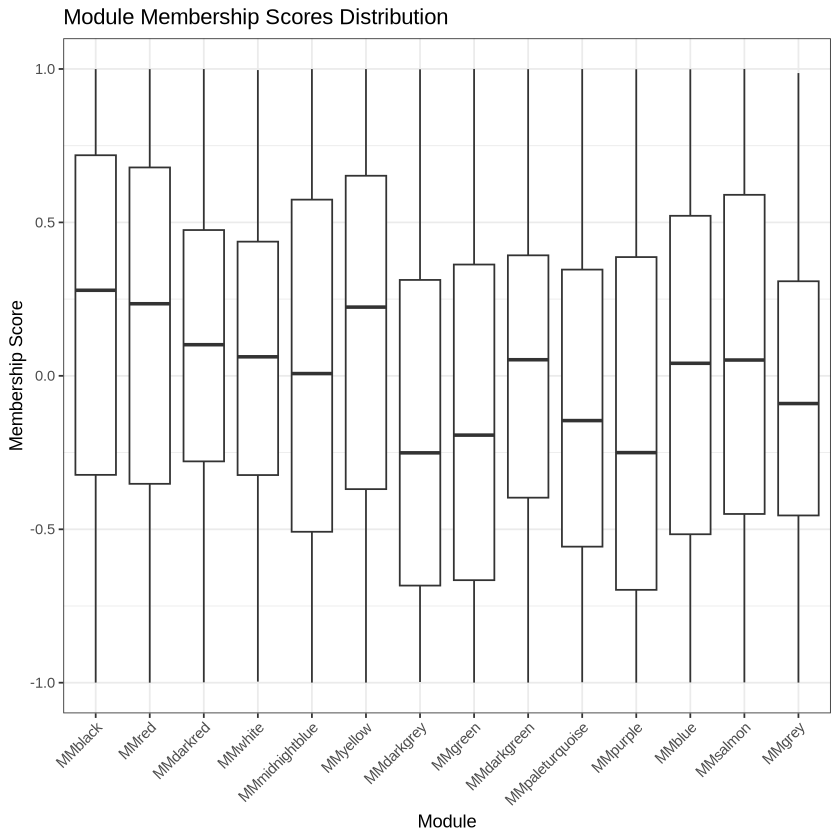

In [79]:
# The next code is a visualozation but colored

# Assuming your DataFrame is named geneModuleMembership and is already loaded

# Reshape the DataFrame for visualization
library(reshape2)
longFormat <- melt(geneModuleMembership, variable.name = "Module", value.name = "MembershipScore")
longFormat$Gene <- rownames(longFormat)  # Ensure gene names are included

# Using ggplot2 for visualization
library(ggplot2)
ggplot(longFormat, aes(x = Module, y = MembershipScore)) +
    geom_boxplot() +
    theme_bw() +
    labs(title = "Module Membership Scores Distribution",
         x = "Module",
         y = "Membership Score") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))


Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”


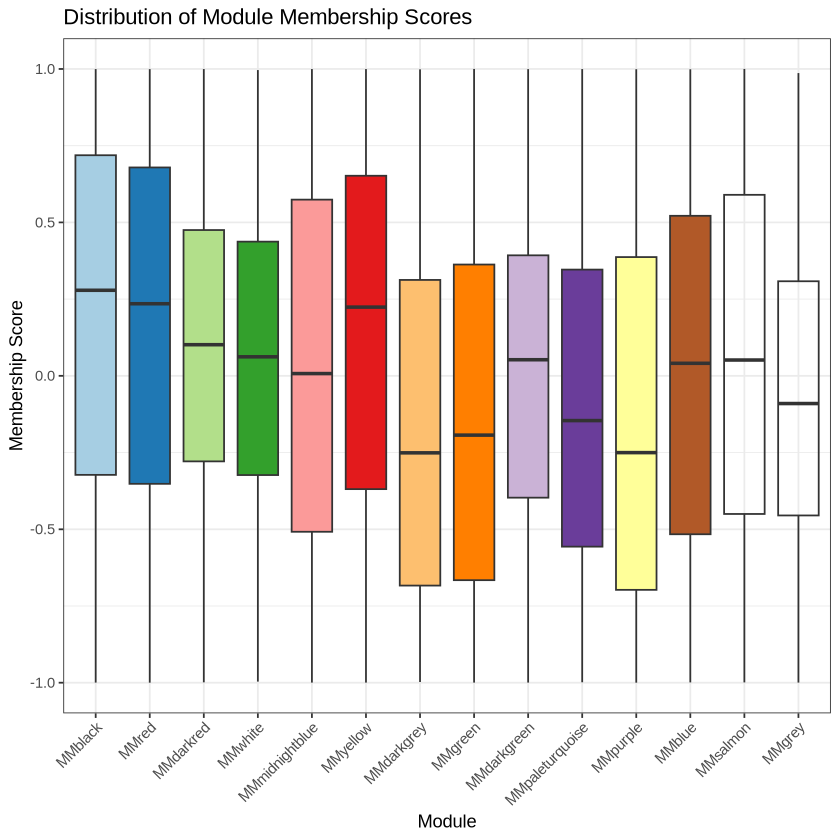

In [80]:
library(ggplot2)
ggplot(longFormat, aes(x = Module, y = MembershipScore, fill = Module)) +
    geom_boxplot() +
    scale_fill_brewer(palette = "Paired") +  # This uses a color palette that provides distinct colors for different modules
    theme_bw() +
    labs(title = "Distribution of Module Membership Scores",
         x = "Module",
         y = "Membership Score") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          legend.position = "none")  # Remove legend if unnecessary


Network Visualization of Eigengenes

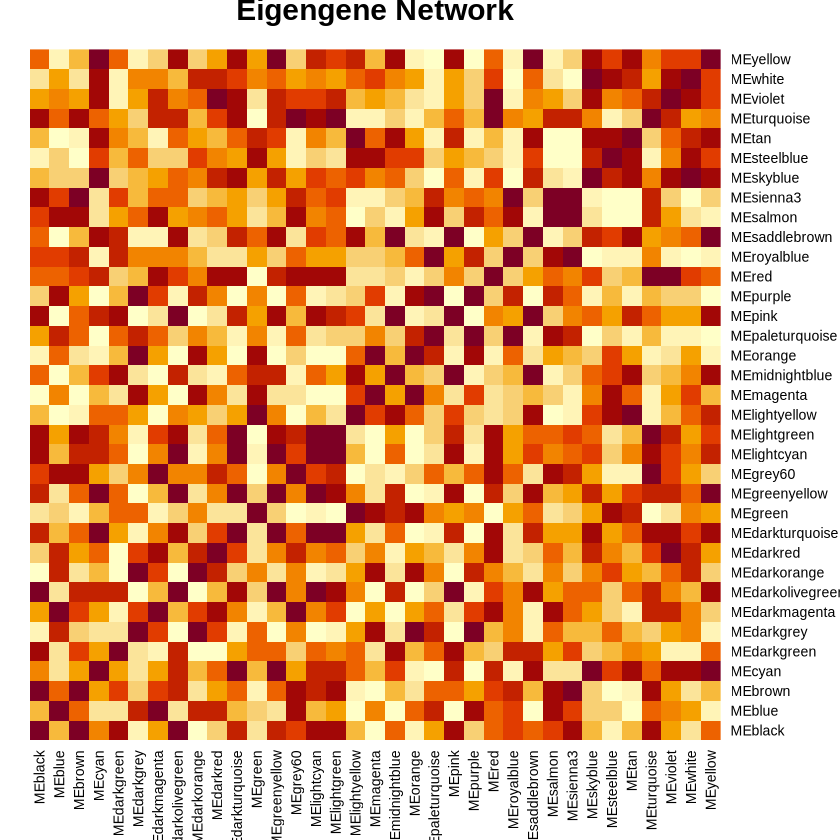

In [81]:
# Assuming 'MEs' is your matrix or dataframe of module eigengenes
# Calculate the correlation matrix of the eigengenes
correlationMatrix <- cor(MEs)

# Visualize the correlation matrix
# Using base R
heatmap(correlationMatrix, symm = TRUE, main = "Eigengene Network", Colv = NA, Rowv = NA, scale = "none")


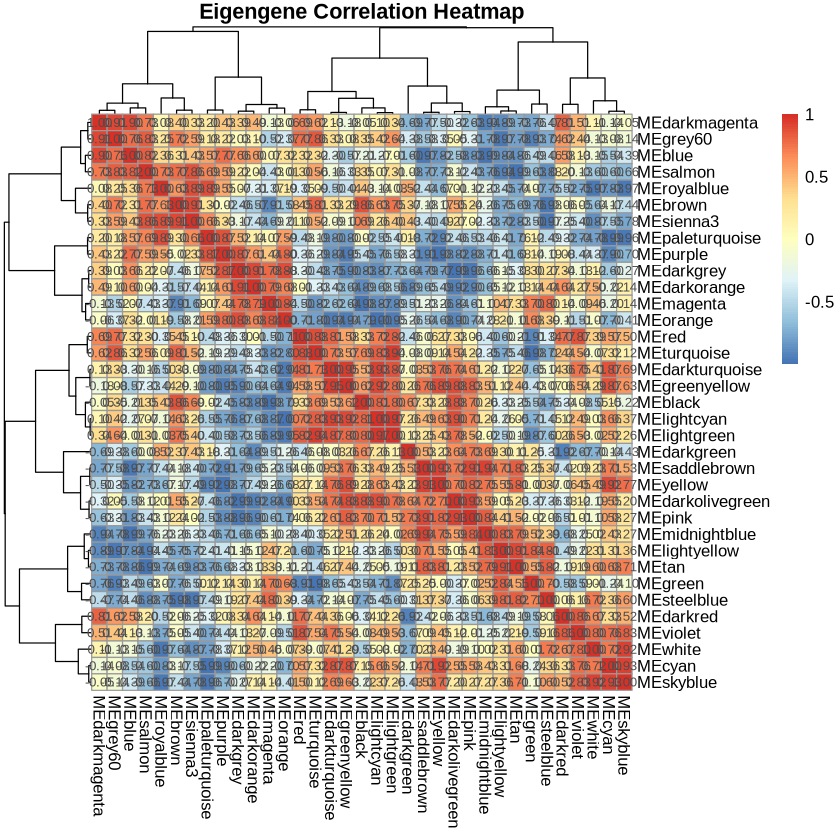

In [82]:
# If not already installed, you might need to install the 'pheatmap' package
# install.packages("pheatmap")
library(pheatmap)

# Create a heatmap using pheatmap
pheatmap(correlationMatrix, clustering_distance_rows = "correlation", clustering_distance_cols = "correlation", cluster_rows = TRUE, cluster_cols = TRUE, display_numbers = TRUE, main = "Eigengene Correlation Heatmap")


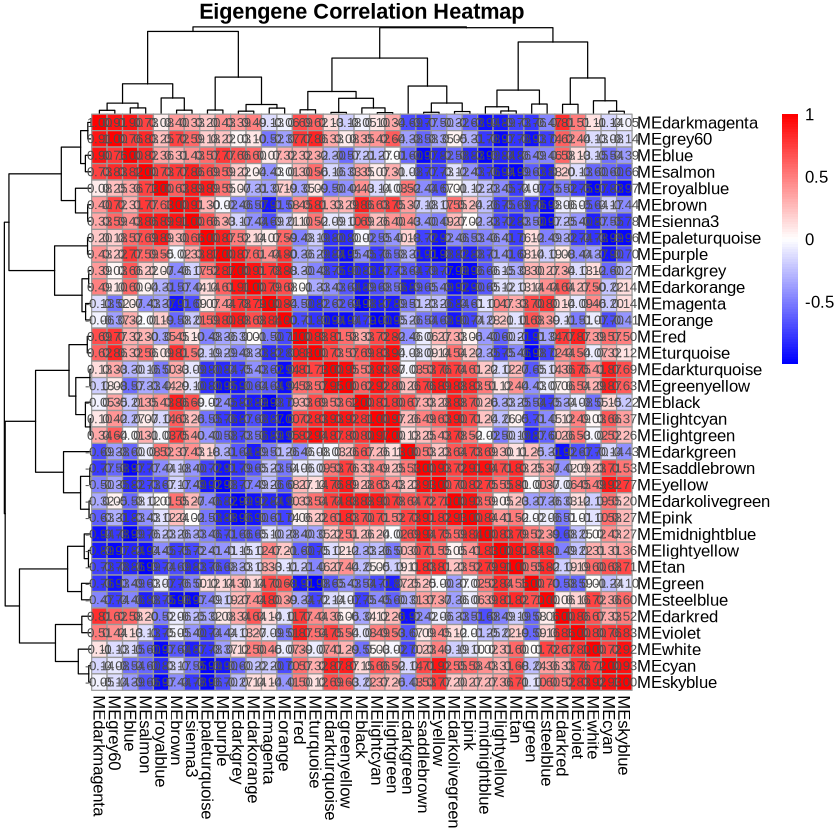

In [83]:
# If not already installed, you might need to install the 'pheatmap' package
# install.packages("pheatmap")
library(pheatmap)

# Define a color palette that transitions from blue to white to red
color_palette <- colorRampPalette(c("blue", "white", "red"))(100)  # 100 discrete colors

# Calculate the correlation matrix if not already done
# Assuming 'MEs' is your matrix of module eigengenes
correlationMatrix <- cor(MEs)

# Create a heatmap with the defined color palette
pheatmap(correlationMatrix,
         clustering_distance_rows = "correlation",
         clustering_distance_cols = "correlation",
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         display_numbers = TRUE,
         color = color_palette,  # Use the custom color palette
         main = "Eigengene Correlation Heatmap")


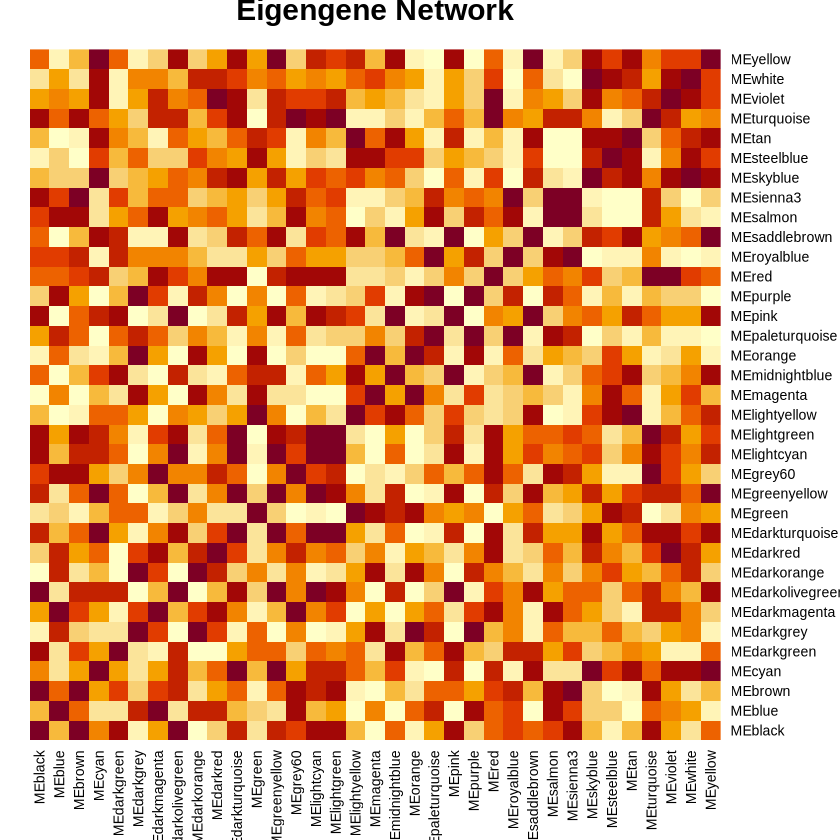

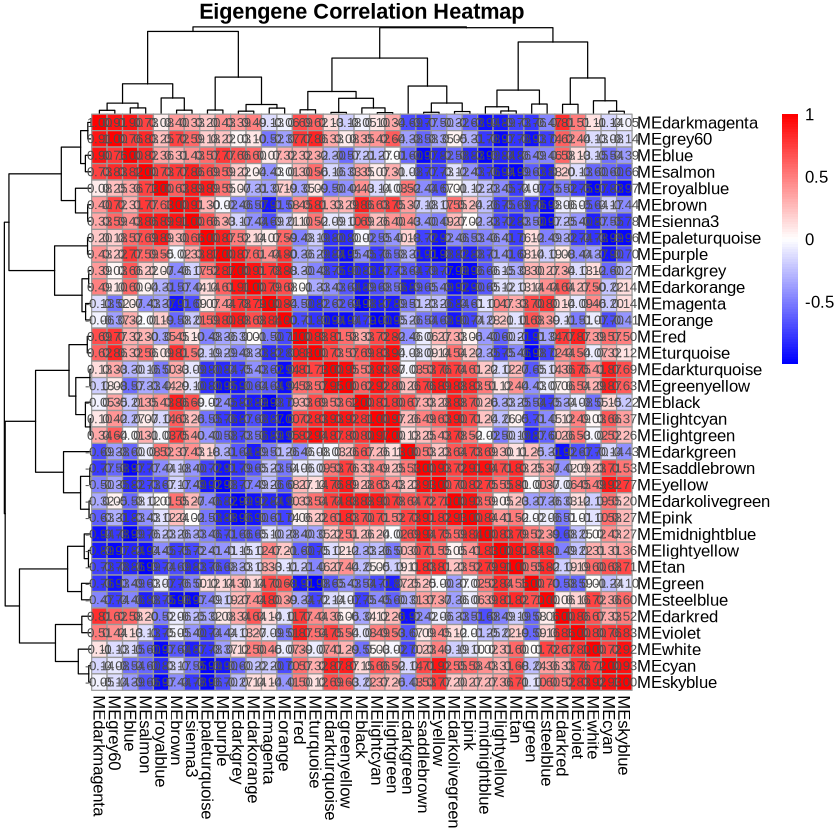

In [84]:
# Calculate the correlation matrix of the eigengenes
correlationMatrix <- cor(MEs)

# Using base R to create a heatmap
heatmap(correlationMatrix, symm = TRUE, main = "Eigengene Network", Colv = NA, Rowv = NA, scale = "none")

# Or using 'pheatmap' for a more customized heatmap
library(pheatmap)
color_palette <- colorRampPalette(c("blue", "white", "red"))(100)
pheatmap(correlationMatrix,
         clustering_distance_rows = "correlation",
         clustering_distance_cols = "correlation",
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         display_numbers = TRUE,
         color = color_palette,  # Custom color palette
         main = "Eigengene Correlation Heatmap")


# RDS file for Opium GSE240457

In [4]:
# Replace "your_file.rds" with your actual file path
data <- readRDS("/data/backup/vmottaqi/GSE240457_SeuratObject-GEO.rds")

In [5]:
summary(data)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




Length  Class   Mode 
     1 Seurat     S4 

In [12]:
str(data)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:685506454] 30 44 48 51 53 70 73 80 83 85 ...
  .. .. .. .. .. ..@ p       : int [1:212714] 0 4349 7891 10303 15731 19522 24312 26884 29852 32570 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 36601 212713
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. .. .. .. .. ..$ : chr [1:212713] "B10_AAACCCAAGACTTCAC" "B10_AAACCCAAGCACACCC" "B10_AAACCCACATGCAGGA" "B10_AAACCCAGTCATCCCT" ...
  .. .. .. .. .. ..@ x       : num [1:685506454] 1 1 3 1 2 1 3 1 1 2 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:685506454]

## RNAseq data

In [36]:
# Assuming `data` is your Seurat object and "RNA" is the assay you're interested in
scaled_data <- data[["RNA"]]@scale.data

In [37]:
# Check the structure of the scaled data
print(dim(scaled_data))

[1]  36601 212713


In [38]:
head(scaled_data)

  [[ suppressing 34 column names ‘B10_AAACCCAAGACTTCAC’, ‘B10_AAACCCAAGCACACCC’, ‘B10_AAACCCACATGCAGGA’ ... ]]



6 x 212713 sparse Matrix of class "dgCMatrix"
                                                                               
MIR1302-2HG . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
FAM138A     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
OR4F5       . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.1  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.3  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.2  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                  
MIR1302-2HG ......
FAM138A     ......
OR4F5       ......
AL627309.1  ......
AL627309.3  ......
AL627309.2  ......

 .....suppressing 212679 columns in show(); maybe adjust options(max.print=, width=)
 ..............................

In [ ]:
# Convert matrix to data frame for easier viewing/manipulation
scaled_df <- as.data.frame(as.matrix(scaled_data))

# Check the first few rows of the dataframe
head(scaled_df)

Visualize the RNAseq data

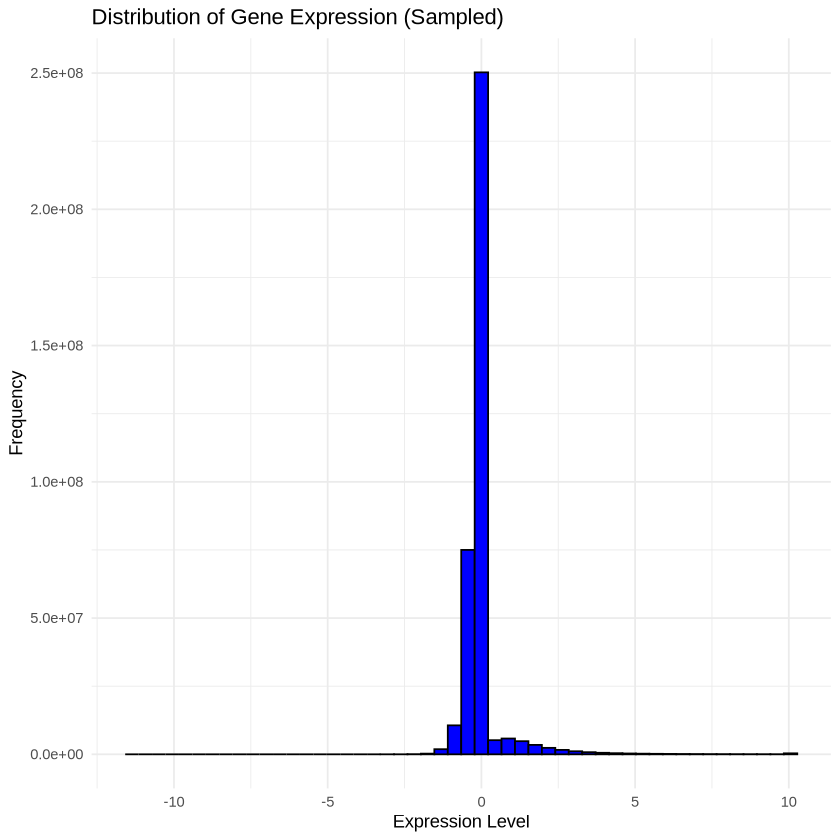

In [10]:

library(ggplot2)

# Extract the scaled data matrix
scaled_data <- data[["RNA"]]@scale.data

# Sample a subset of columns (cells) randomly, let's say 1,000 cells
set.seed(123)  # for reproducibility
sampled_columns <- sample(ncol(scaled_data), 10000)
sampled_data <- scaled_data[, sampled_columns]

# Convert the sampled data to a long format vector for histogram plotting
long_sampled_data <- as.vector(sampled_data)

# Plotting the histogram
ggplot(data = data.frame(expression = long_sampled_data), aes(x = expression)) +
  geom_histogram(bins = 50, fill = "blue", color = "black") +
  labs(title = "Distribution of Gene Expression (Sampled)",
       x = "Expression Level",
       y = "Frequency") +
  theme_minimal()

In [26]:
# Assuming `data` is your Seurat object and scaled data is stored appropriately
scaled_data <- data[["RNA"]]@scale.data

# Calculate mean expression for each gene across all samples
gene_means <- rowMeans(scaled_data)

# Convert to a data frame for ggplot
mean_expression_df <- data.frame(meanExpression = gene_means)

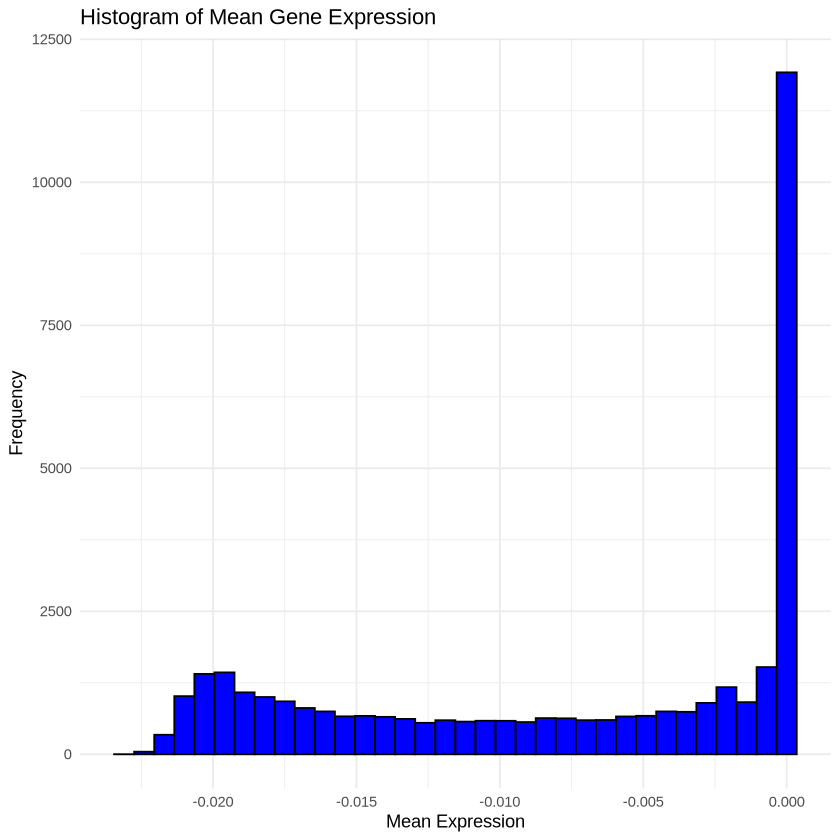

In [32]:
# Plotting the histogram of mean gene expression
ggplot(mean_expression_df, aes(x = meanExpression)) +
  geom_histogram(binwidth = 0.0007, fill = "blue", color = "black") +
  labs(title = "Histogram of Mean Gene Expression",
       x = "Mean Expression",
       y = "Frequency") +
  theme_minimal()

## Metadata

In [11]:
# Assuming `data` is your Seurat object
metadata <- data@meta.data

# View the first few rows of the metadata to understand its structure
head(metadata)

orig.ident nCount_RNA nFeature_RNA NEW_BARCODE         
B10_AAACCCAAGACTTCAC sc-brain   19884      4349         B10_AAACCCAAGACTTCAC
B10_AAACCCAAGCACACCC sc-brain   12941      3542         B10_AAACCCAAGCACACCC
B10_AAACCCACATGCAGGA sc-brain    5308      2412         B10_AAACCCACATGCAGGA
B10_AAACCCAGTCATCCCT sc-brain   24725      5428         B10_AAACCCAGTCATCCCT
B10_AAACCCATCATAGCAC sc-brain    9684      3791         B10_AAACCCATCATAGCAC
B10_AAACGAAAGCTCTTCC sc-brain   19989      4790         B10_AAACGAAAGCTCTTCC
                     DROPLET.TYPE SNG.BEST.GUESS EXP percent.mt sampleID
B10_AAACCCAAGACTTCAC SNG          AKB50          B10 0.18105009 AKB50   
B10_AAACCCAAGCACACCC SNG          AKB49          B10 0.34773201 AKB49   
B10_AAACCCACATGCAGGA SNG          AKB52          B10 0.37678975 AKB52   
B10_AAACCCAGTCATCCCT SNG          AKB52          B10 0.05257836 AKB52   
B10_AAACCCATCATAGCAC SNG          AKB51          B10 0.18587361 AKB51   
B10_AAACGAAAGCTCTTCC SNG          AKB49          B10 0.57031367 AKB49   
                     comb      Batch  RNA_snn_res.0.07 seurat_clusters
B10_AAACCCAAGACTTCAC AKB50_B10 Bannon 1                1              
B10_AAACCCAAGCACACCC AKB49_B10 Bannon 7                7              
B10_AAACCCACATGCAGGA AKB52_B10 Bannon 2                2              
B10_AAACCCAGTCATCCCT AKB52_B10 Bannon 5                5              
B10_AAACCCATCATAGCAC AKB51_B10 Bannon 1                1              
B10_AAACGAAAGCTCTTCC AKB49_B10 Bannon 5                5              
                     celltype 
B10_AAACCCAAGACTTCAC Astrocyte
B10_AAACCCAAGCACACCC DA       
B10_AAACCCACATGCAGGA Microglia
B10_AAACCCAGTCATCCCT ODC      
B10_AAACCCATCATAGCAC Astrocyte
B10_AAACGAAAGCTCTTCC ODC

In [13]:
summary(metadata)

  orig.ident          nCount_RNA      nFeature_RNA   NEW_BARCODE       
 Length:212713      Min.   :   500   Min.   :  177   Length:212713     
 Class :character   1st Qu.:  4825   1st Qu.: 2341   Class :character  
 Mode  :character   Median :  7775   Median : 3125   Mode  :character  
                    Mean   :  9495   Mean   : 3223                     
                    3rd Qu.: 11971   3rd Qu.: 3975                     
                    Max.   :238880   Max.   :13022                     
                                                                       
 DROPLET.TYPE       SNG.BEST.GUESS         EXP              percent.mt      
 Length:212713      Length:212713      Length:212713      Min.   : 0.00000  
 Class :character   Class :character   Class :character   1st Qu.: 0.06686  
 Mode  :character   Mode  :character   Mode  :character   Median : 0.15752  
                                                          Mean   : 0.33886  
                                       

In [14]:
# Calculate the number of unique values in each column
unique_counts <- sapply(metadata, function(x) length(unique(x)))

# Print the results
print(unique_counts)

      orig.ident       nCount_RNA     nFeature_RNA      NEW_BARCODE 
               1            29458             8583           212713 
    DROPLET.TYPE   SNG.BEST.GUESS              EXP       percent.mt 
               1               95               27           133352 
        sampleID             comb            Batch RNA_snn_res.0.07 
              95               95                2               14 
 seurat_clusters         celltype 
              14               10 


In [25]:
# Print unique values for specific columns
cat("Unique values in celltype:\n", unique(metadata$celltype), "\n\n")
cat("Unique values in EXP:\n", unique(metadata$EXP), "\n\n")
cat("Unique values in Batch:\n", unique(metadata$Batch), "\n\n")
cat("Unique values in RNA_snn_res.0.07:\n", unique(metadata$RNA_snn_res.0.07), "\n\n")
cat("Unique values in SNG.BEST.GUESS:\n", unique(metadata$SNG.BEST.GUESS), "\n\n")
cat("Unique values in comb:\n", unique(metadata$comb), "\n\n")
cat("Unique values in sampleID:\n", unique(metadata$sampleID), "\n\n")


Unique values in celltype:
 Astrocyte DA Microglia ODC Endothelial OPC T-cell Pericyte Non_DA Ependymal 

Unique values in EXP:
 B10 B11 B12 B1R B2R B3R B4R B5R B6R B7 B9 M1 M10 M11 M13 M15 M16 M17 M18 M19 M2 M20 M3 M4 M5 M7 M9 

Unique values in Batch:
 Bannon Mash 

Unique values in RNA_snn_res.0.07:
 2 12 7 10 13 4 1 8 3 14 11 9 6 5 

Unique values in SNG.BEST.GUESS:
 AKB50 AKB49 AKB52 AKB51 AKB54 AKB56 AKB55 AKB53 AKB57 AKB59 AKB58 AKB60 AKB18 AKB19 AKB17 AKB20 AKB13 AKB14 AKB16 AKB15 AKB27 AKB28 AKB26 AKB25 8042579167_JN0000124_HCTLI_8042579167_JN0000124_HCTLI 8042579075_JN0000032_HCTDX_8042579075_JN0000032_HCTDX AKB30 AKB29 AKB32 AKB31 AKB34 AKB36 AKB33 AKB35 AKB39 AKB38 AKB40 AKB37 AKB47 AKB45 AKB48 AKB46 8042579048_JN0000005_HCCOD_8042579048_JN0000005_HCCOD 8042579123_JN0000080_HCCFY_8042579123_JN0000080_HCCFY 8042579092_JN0000049_HCTMB_8042579092_JN0000049_HCTMB 8042579077_JN0000034_HCTLJ_8042579077_JN0000034_HCTLJ 8042579098_JN0000055_HCCLX_8042579098_JN0000055_HCCLX 80425791

In [18]:
library(dplyr)
# Calculating unique 'comb' values per 'Batch'
unique_comb_per_batch <- metadata %>%
  group_by(Batch) %>%
  summarise(UniqueCombs = n_distinct(comb), .groups = 'drop')

# Print the results
print(unique_comb_per_batch)

# A tibble: 2 × 2
  Batch  UniqueCombs
  <chr>        <int>
1 Bannon          44
2 Mash            51


In [21]:
# Extracting unique 'sampleID' per 'Batch'
sample_id_per_batch <- metadata %>%
  group_by(Batch) %>%
  summarise(UniqueSampleIDs = list(unique(sampleID)), .groups = 'drop')

# Print the results more clearly
for (i in 1:nrow(sample_id_per_batch)) {
  cat("Batch:", sample_id_per_batch$Batch[i], "\n")
  cat("Unique SampleIDs:\n")
  print(sample_id_per_batch$UniqueSampleIDs[[i]], quote = FALSE)
  cat("\n")
}

Batch: Bannon 
Unique SampleIDs:
 [1] AKB50 AKB49 AKB52 AKB51 AKB54 AKB56 AKB55 AKB53 AKB57 AKB59 AKB58 AKB60
[13] AKB18 AKB19 AKB17 AKB20 AKB13 AKB14 AKB16 AKB15 AKB27 AKB28 AKB26 AKB25
[25] AKB30 AKB29 AKB32 AKB31 AKB34 AKB36 AKB33 AKB35 AKB39 AKB38 AKB40 AKB37
[37] AKB47 AKB45 AKB48 AKB46 AKB22 AKB23 AKB24 AKB21

Batch: Mash 
Unique SampleIDs:
 [1] HCTLI   HCTDX   HCCOD   HCCFY   HCTMB   HCTLJ   HCCLX   HCTHF   HCCNU  
[10] HCCLC   HCTBL   HCCIL   HCTDJ   HCTDL   HCCPN   HCCLS   HCTDQ   HCTPA  
[19] HCTIU   HCCOV   HCCHO   HCCOE   HCTRP   HCTXC   HCTQQ   HCCFW   HCCUD  
[28] HCTVF   HCCWQ   HCCFV   HCTMQ   HCTZC   HCCJY   HCTVE   HCCWK   HCCWH  
[37] HCTDO   HCTMU   HCCDO   HCTMA   HCTNZ   HCTMZ   HCTME   HCTMW   NIH1028
[46] HCTEB   HCCLL   HCCKC   HCCCX   HCCOQ   HCCX   



In [23]:
# Group by sampleID and count unique NEW_BARCODEs
unique_barcodes_per_sampleID <- metadata %>%
  group_by(sampleID) %>%
  summarise(UniqueNewBarcodes = n_distinct(NEW_BARCODE), .groups = 'drop')  # This line not only groups the data but also ensures that the grouping doesn't persist beyond this operation, which is useful for maintaining a clean workspace.

# Change options to allow more printed output
options(dplyr.print_max = Inf)  # or use a large number if Inf doesn't work

# Display the results
print(unique_barcodes_per_sampleID)

# A tibble: 95 × 2
   sampleID UniqueNewBarcodes
   <chr>                <int>
 1 AKB13                 1091
 2 AKB14                 2888
 3 AKB15                 1393
 4 AKB16                 1903
 5 AKB17                 2739
 6 AKB18                 2201
 7 AKB19                 2220
 8 AKB20                 2534
 9 AKB21                 2797
10 AKB22                 3185
11 AKB23                 2878
12 AKB24                 1991
13 AKB25                 2945
14 AKB26                 2831
15 AKB27                 3842
16 AKB28                 3523
17 AKB29                 3024
18 AKB30                 3487
19 AKB31                 2295
20 AKB32                 1987
21 AKB33                 2525
22 AKB34                 3723
23 AKB35                 3513
24 AKB36                 2283
25 AKB37                 1047
26 AKB38                 3004
27 AKB39                 3080
28 AKB40                 1794
29 AKB45                 1353
30 AKB46                 1768
31 AKB47             

In [24]:
# Group by sampleID and count unique cell types
unique_celltypes_per_sampleID <- metadata %>%
  group_by(sampleID) %>%
  summarise(UniqueCellTypes = n_distinct(celltype), .groups = 'drop')  # Dropping groups after summarisation

# Print the results
print(unique_celltypes_per_sampleID)

# A tibble: 95 × 2
   sampleID UniqueCellTypes
   <chr>              <int>
 1 AKB13                  9
 2 AKB14                  9
 3 AKB15                  9
 4 AKB16                  9
 5 AKB17                  9
 6 AKB18                  9
 7 AKB19                  9
 8 AKB20                  9
 9 AKB21                  9
10 AKB22                  9
11 AKB23                  9
12 AKB24                  9
13 AKB25                  9
14 AKB26                  9
15 AKB27                  9
16 AKB28                  9
17 AKB29                  9
18 AKB30                  9
19 AKB31                  9
20 AKB32                  9
21 AKB33                  9
22 AKB34                  9
23 AKB35                  9
24 AKB36                  9
25 AKB37                  9
26 AKB38                  9
27 AKB39                  9
28 AKB40                  9
29 AKB45                  9
30 AKB46                  9
31 AKB47                  9
32 AKB48                  9
33 AKB49                  9
3